In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import pandas as pd

sns.set(font_scale=1.7)
root = '/Users/bolin/Library/CloudStorage/OneDrive-UniversityofToronto/AutoLTS/res/'

# Res50-FC Loss Visualization

In [39]:
def check_loss(file_name, loss_type='CE'):
    # load loss records
    path = root + f'{file_name}_loss.txt'
    loss = np.loadtxt(path, delimiter=',')
    if loss_type == 'CE':
        train_loss = loss[:, 0] / 27407
        vali_loss = loss[:, 1] / 5873
    else:
        train_loss = loss[:, 0]
        vali_loss = loss[:, 1]
    # serch for the lowest validation point
    idx = np.argmin(vali_loss)
    # visualize
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(train_loss, label='Training', color='blue')
    ax.plot(vali_loss, label='Validation', color='red')
    print(idx)
    ax.hlines(vali_loss[idx], 0, len(train_loss), color='black', linestyle='dashed')
    ax.set_title(f'Experiment ID {file_name}', size=15)
    ax.set_xlabel('Epoch', size=20)
    ax.set_ylabel('Mean Cross Entropy Loss', size=20)
    plt.legend(fontsize=18)
    
    
    plt.show()

8


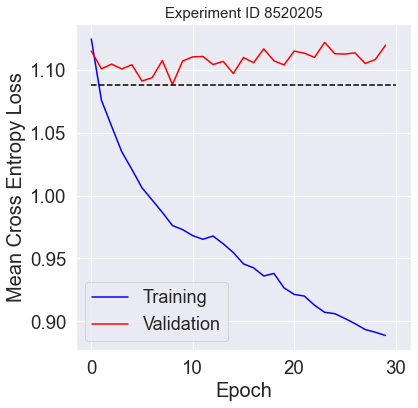

In [5]:
check_loss('8520205')

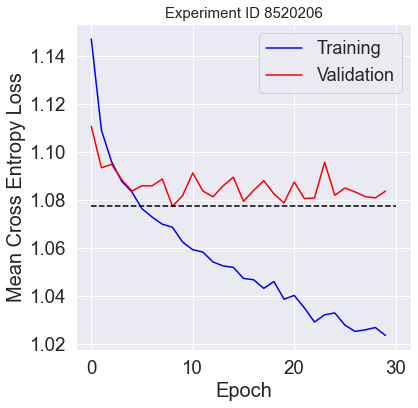

In [98]:
check_loss('8520206')

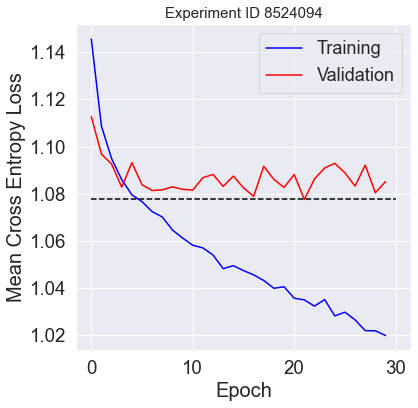

In [101]:
check_loss('8524094')

16


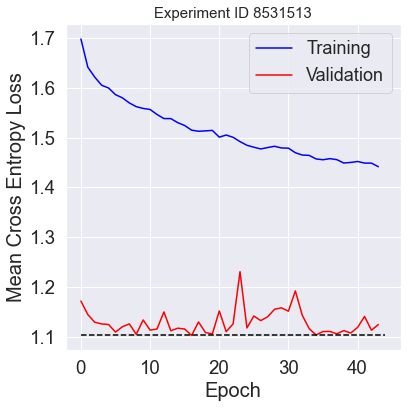

In [8]:
check_loss('8531513')

38


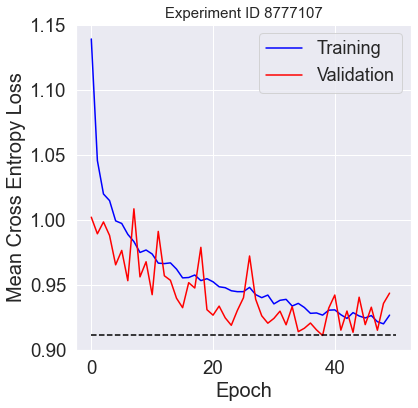

In [10]:
# res50 forzen
check_loss('8777107')

5


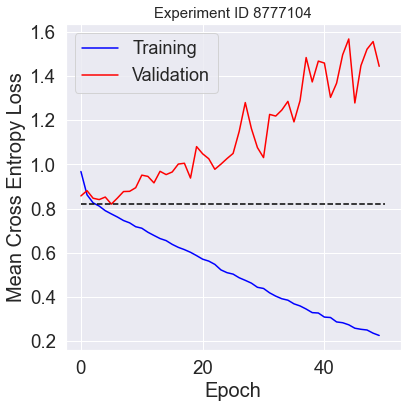

In [11]:
# res 50 unfrozen
check_loss('8777104')

22


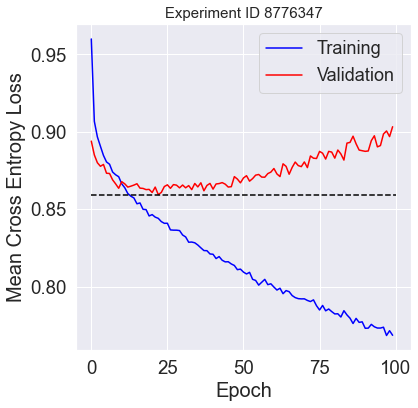

In [41]:
check_loss('8776347')

3


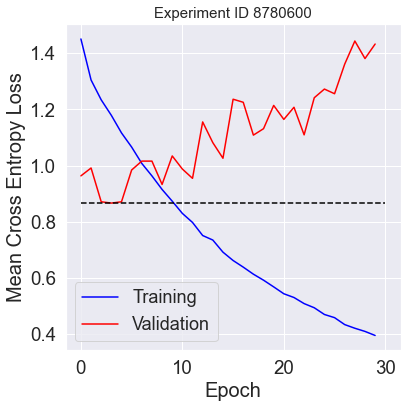

In [7]:
check_loss('8780600')

29


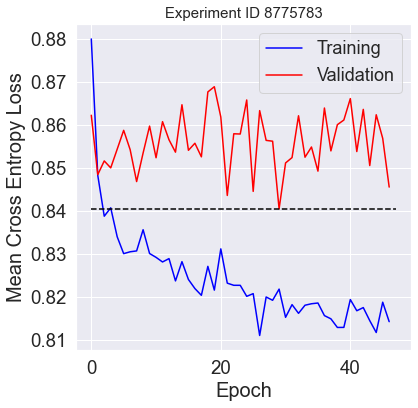

In [14]:
check_loss('8775783')

3


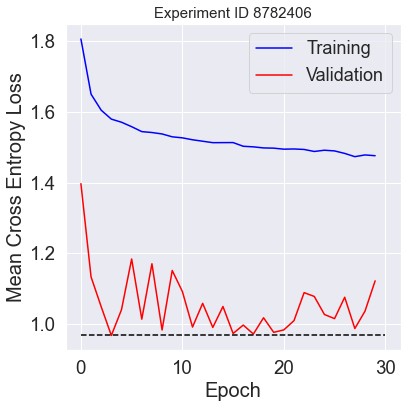

In [17]:
check_loss('8782406')

2


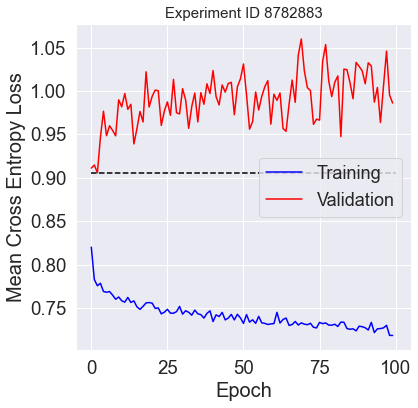

In [20]:
check_loss('8782883')

23


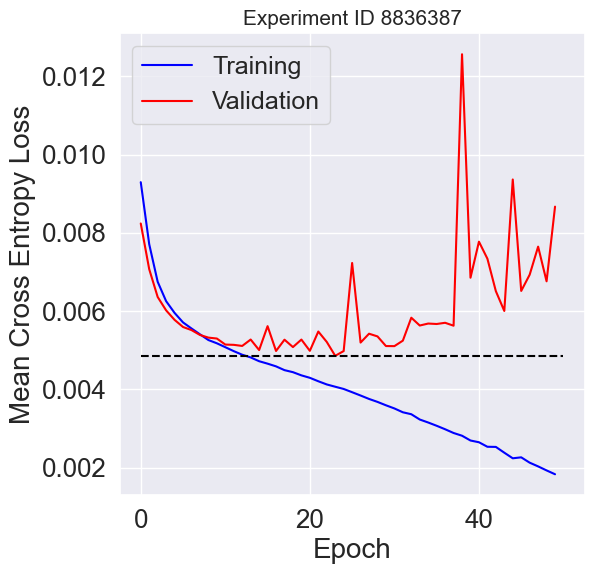

In [13]:
# End-2-end image + n lanes + speed
check_loss('8836387')

45


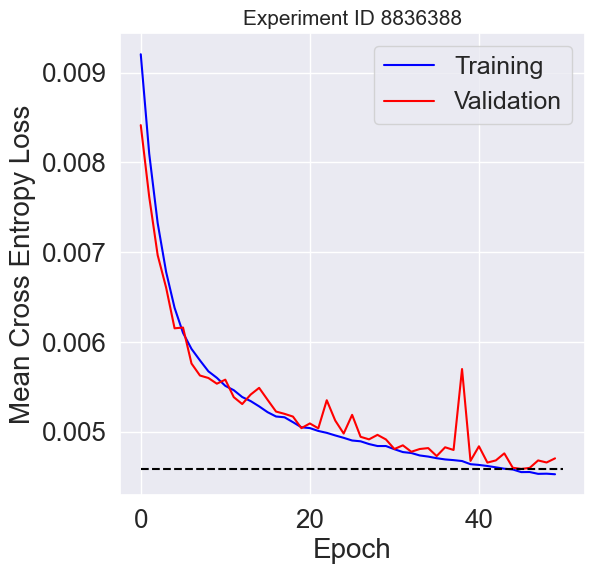

In [16]:
# End-2-end image + n lanes + speed
check_loss('8836388')

49


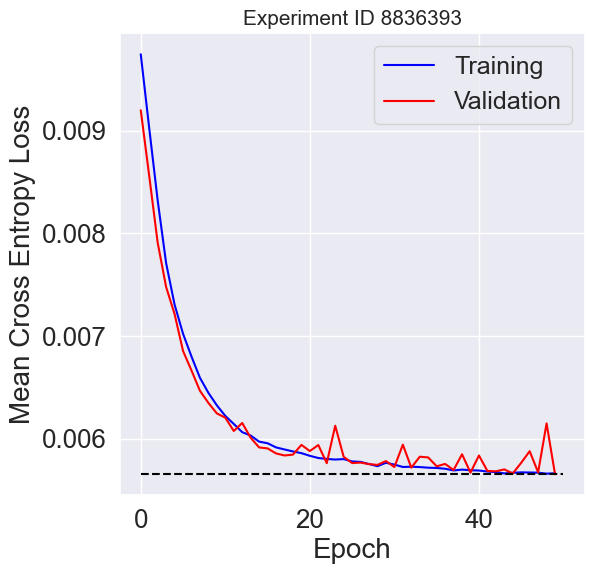

In [18]:
# End-2-end image + road type + cyc fras
check_loss('8836393')

15


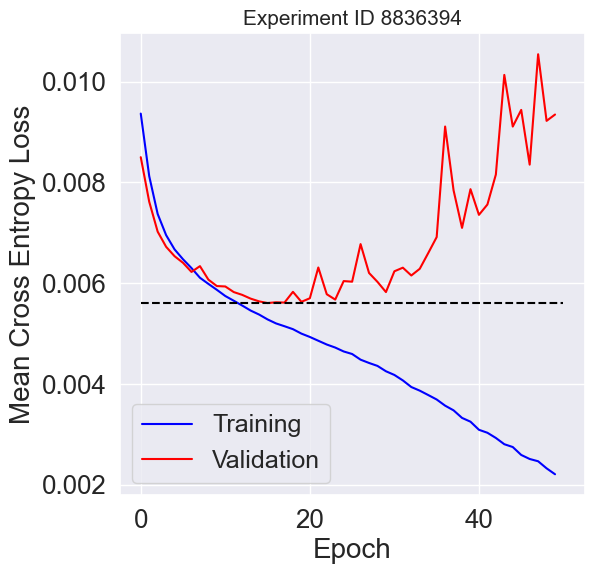

In [19]:
# End-2-end image + road type + cyc fras
check_loss('8836394')

98


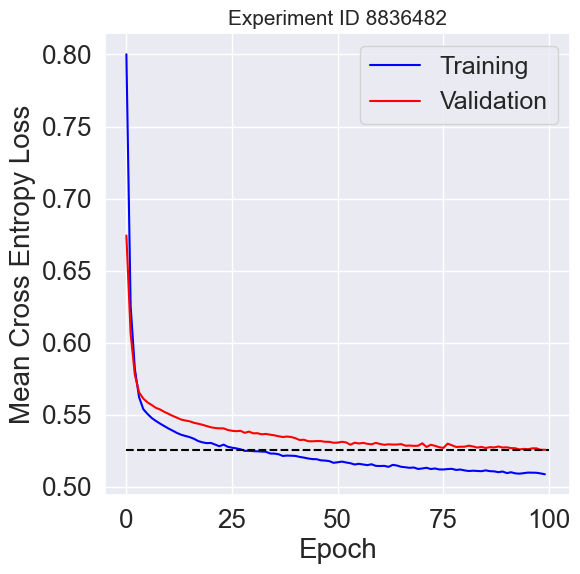

In [23]:
# MoCo + n_lanes + speed_limit
check_loss('8836482')

96


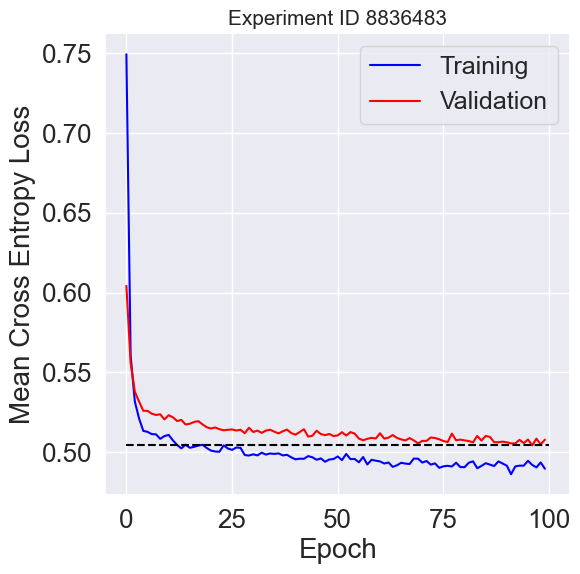

In [24]:
# SupMoCo + n_lanes + speed_limit
check_loss('8836483')

90


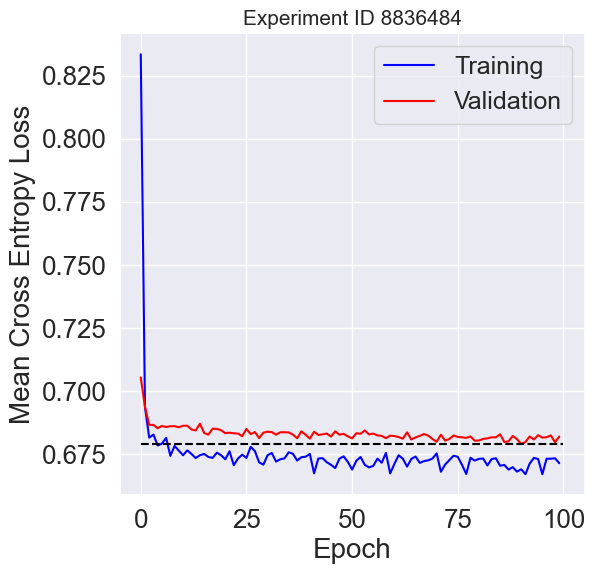

In [26]:
# SupMoCo + road type + cyc fras
check_loss('8836484')

93


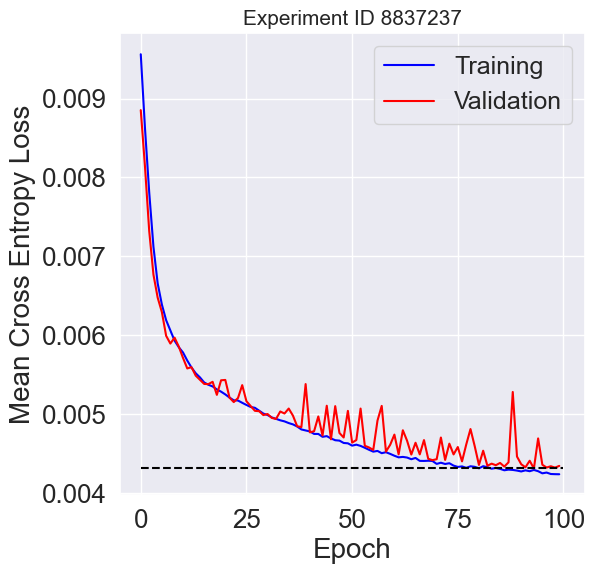

In [58]:
# End2End Frozen + n lanes + speed (unfinished)
check_loss('8837237')

92


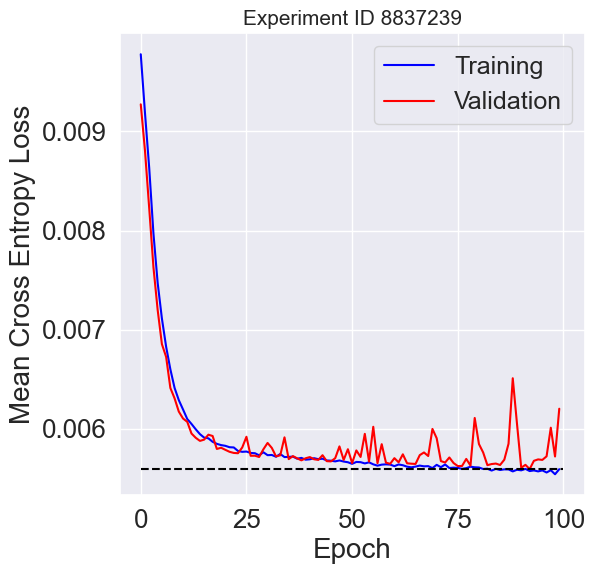

In [59]:
# End2End Frozen + road type + cyc infras (unfinished)
check_loss('8837239')

115


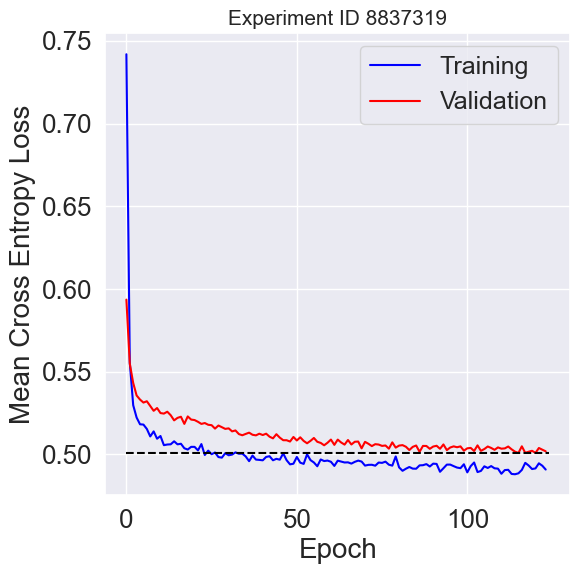

In [47]:
# SupMoCo + n lanes + speed (unfinished)
check_loss('8837319')

98


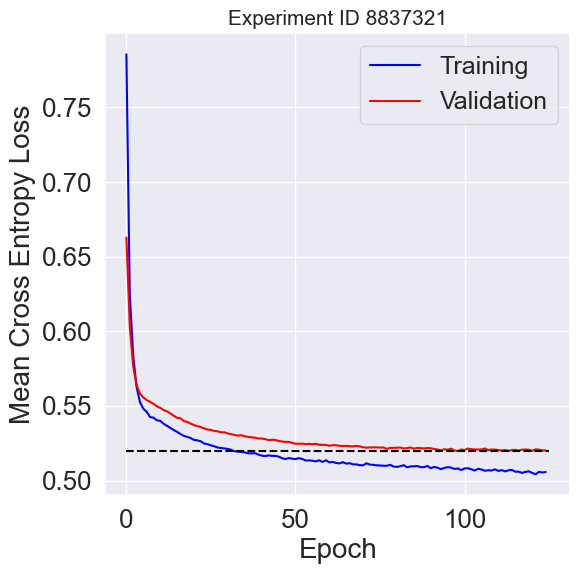

In [48]:
# MoCo + road type + cyc infras (unfinished)
check_loss('8837321')

123


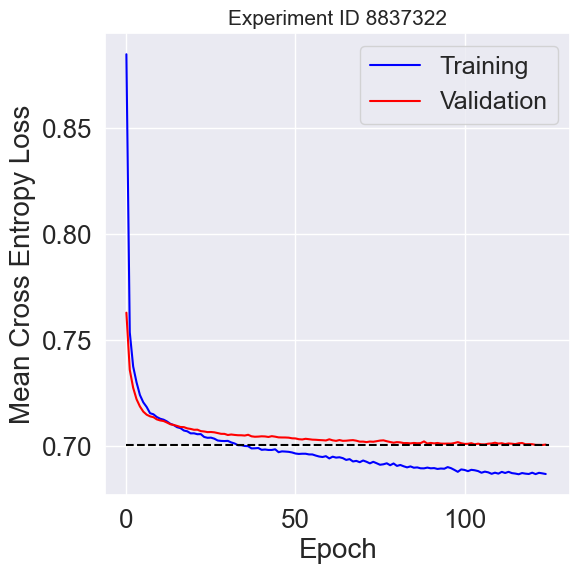

In [49]:
# MoCo + n lanes + speed (unfinished)
check_loss('8837322')

82


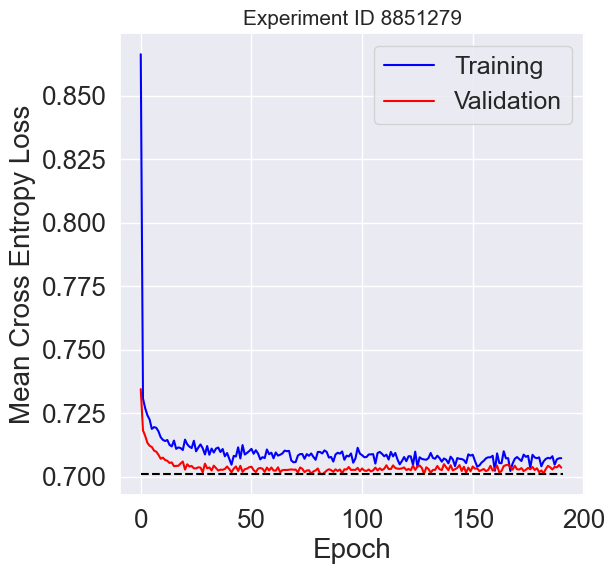

In [13]:
# SupMoCo
check_loss('8851279')

82


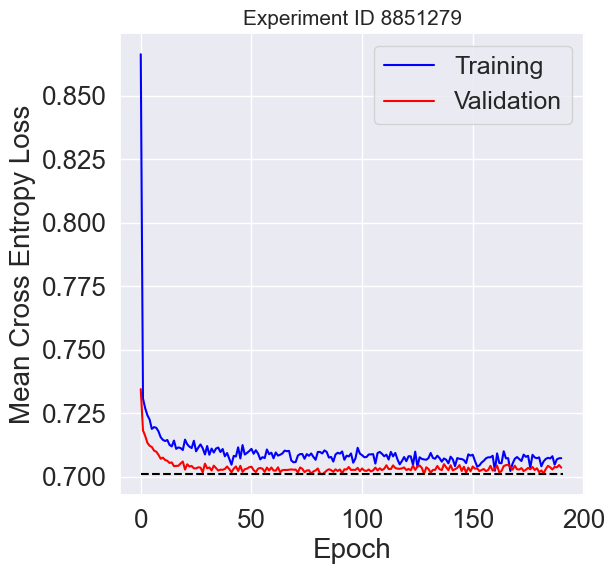

In [15]:
# Ratio-SupMoCo + road type + cyc infras
check_loss('8851279')

185


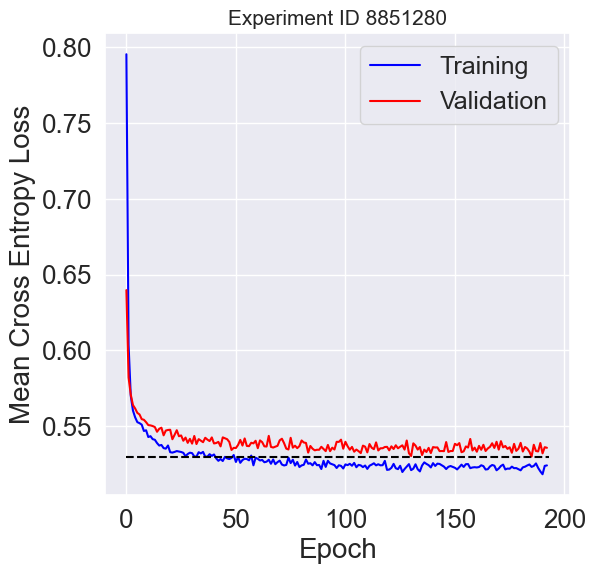

In [16]:
# Ratio-SupMoCo + n lanes + speed
check_loss('8851280')

120


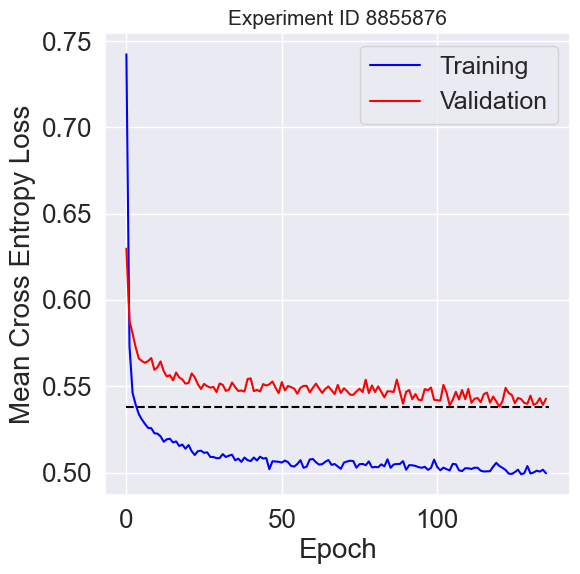

In [25]:
# Ratio-SupMoCo - 580
check_loss('8855876')

124


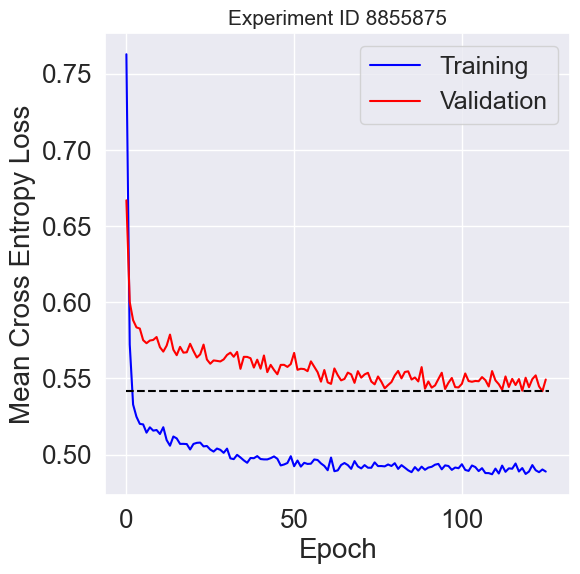

In [26]:
# Ratio-SupMoCo - 640
check_loss('8855875')

55


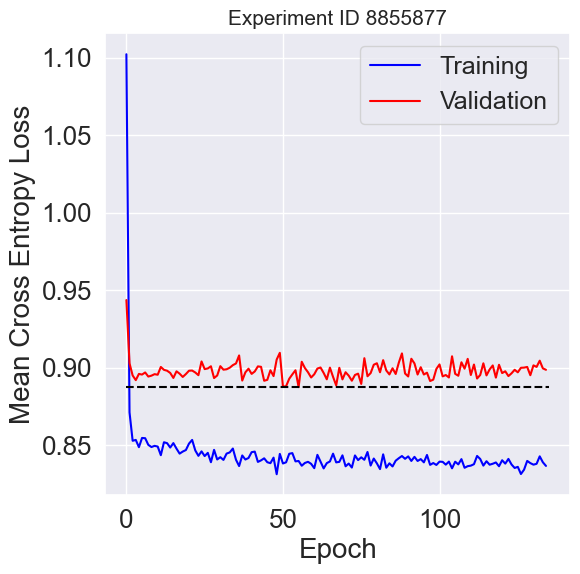

In [28]:
# Ratio-SupMoCo - 580 + n lanes + speed
check_loss('8855877')

97


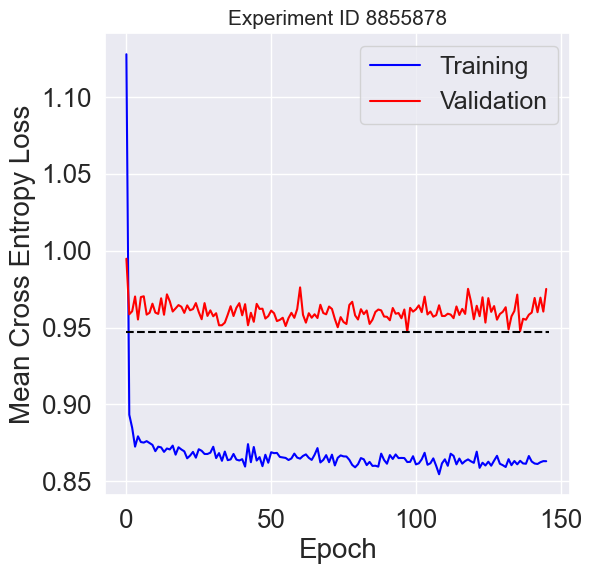

In [29]:
# Ratio-SupMoCo - 640 + n lanes + speed
check_loss('8855878')

# Res50-FC Speed Actual Prediction

84


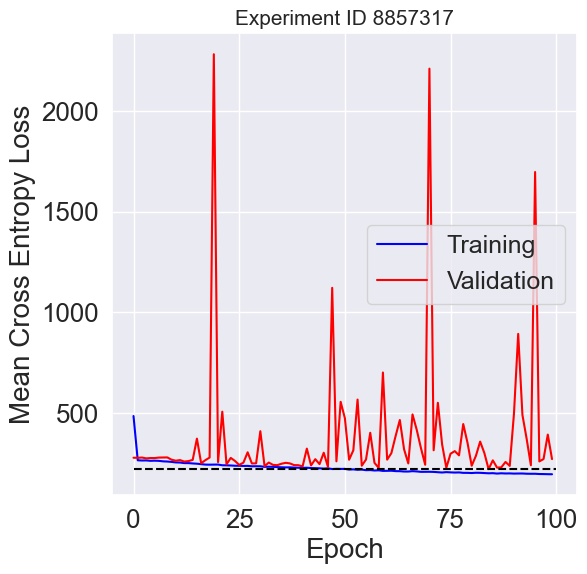

In [43]:
# Res50
check_loss('8857317', loss_type='mse')

7


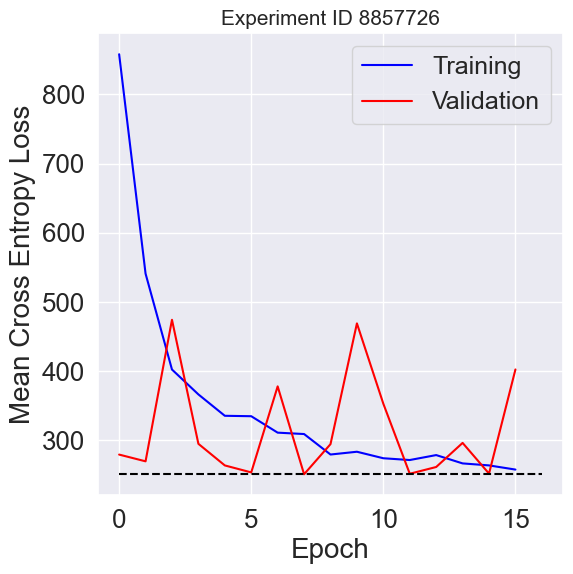

In [44]:
# Res50
check_loss('8857726', loss_type='mse')

17


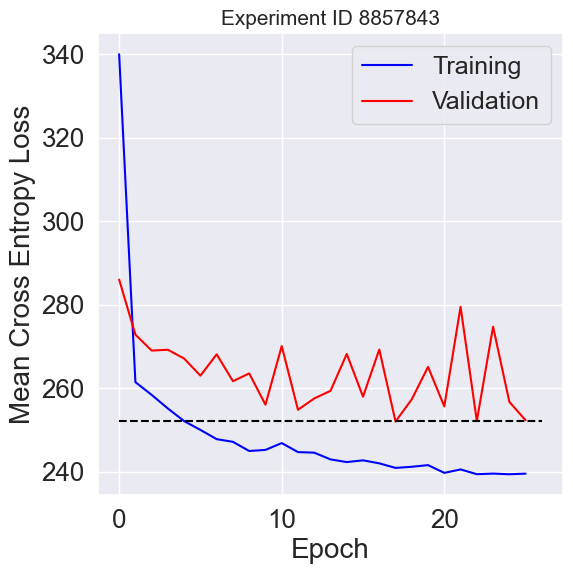

In [40]:
# Res50
check_loss('8857843', loss_type='mse')

# Res50-FC Confusion Matrix Visualization

In [10]:
def check_conf_mat(file_name):
    # load data
    res = torch.load(root + f'{file_name}_res.pt')
    # visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax_cbar = fig.add_axes([0.93, 0.13, 0.02, 0.75])
    for idx, dataset in enumerate(['training', 'validation', 'test']):
        data = res[dataset]['conf_mat'] * 100
        acc = res[dataset]['accuracy']
        sns.heatmap(data, ax=ax[idx], annot=True, cmap=sns.light_palette("seagreen", reverse=False), 
                    vmin=0, vmax=100, annot_kws={'fontsize':22}, cbar_ax=ax_cbar)
        ax[idx].set_title(f'{dataset} (accuracy {acc:.2f}%)', size=20)
        ax[idx].set_xticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_yticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_xlabel('Predicted Label', size=20)
        if idx == 0:
            ax[idx].set_ylabel('True Label', size=25)
    plt.show()

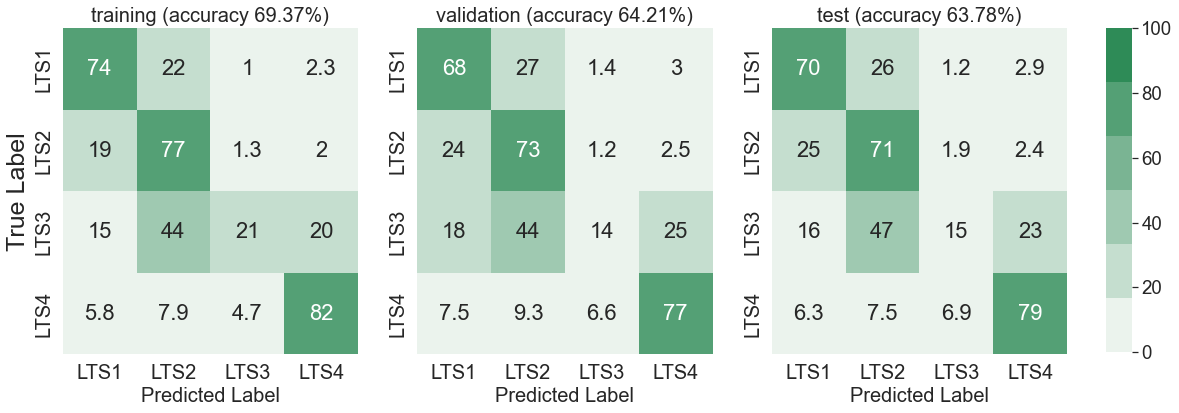

In [11]:
check_conf_mat('8504035_4')

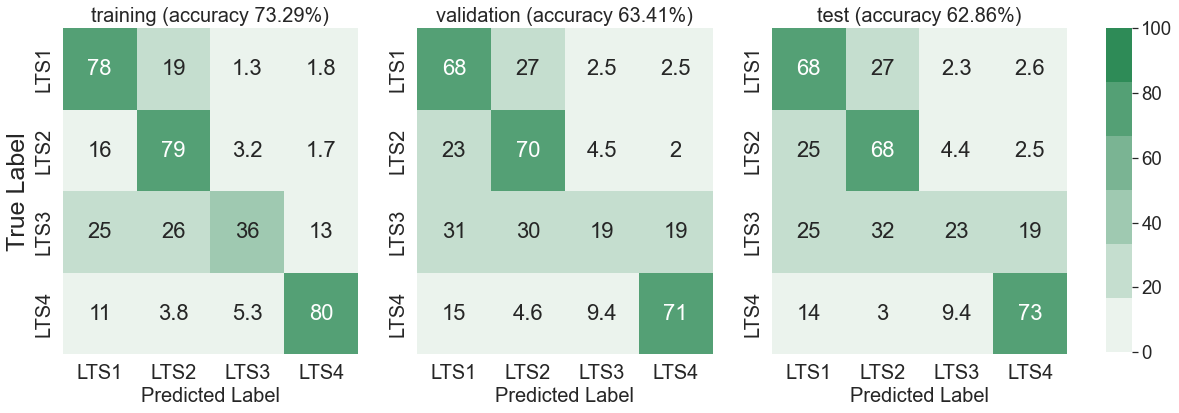

In [113]:
check_conf_mat('8520205_4')

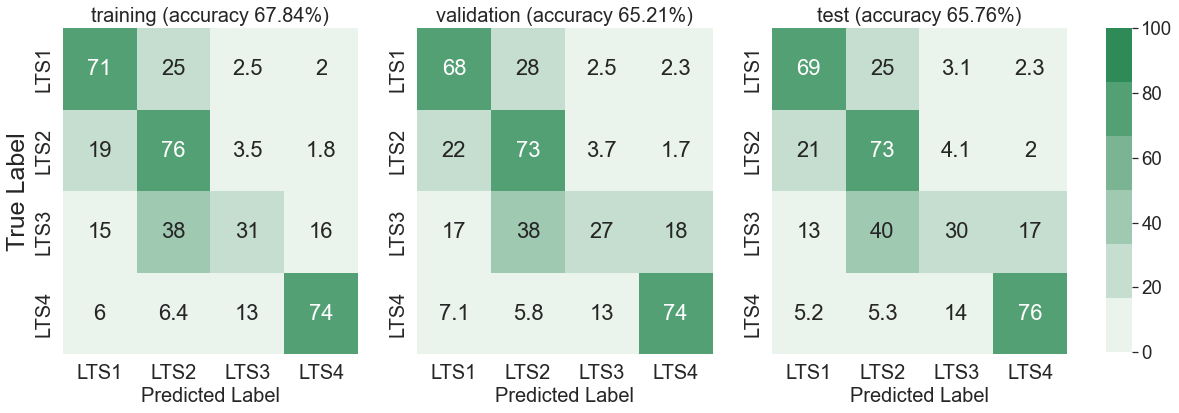

In [114]:
check_conf_mat('8520206_4')

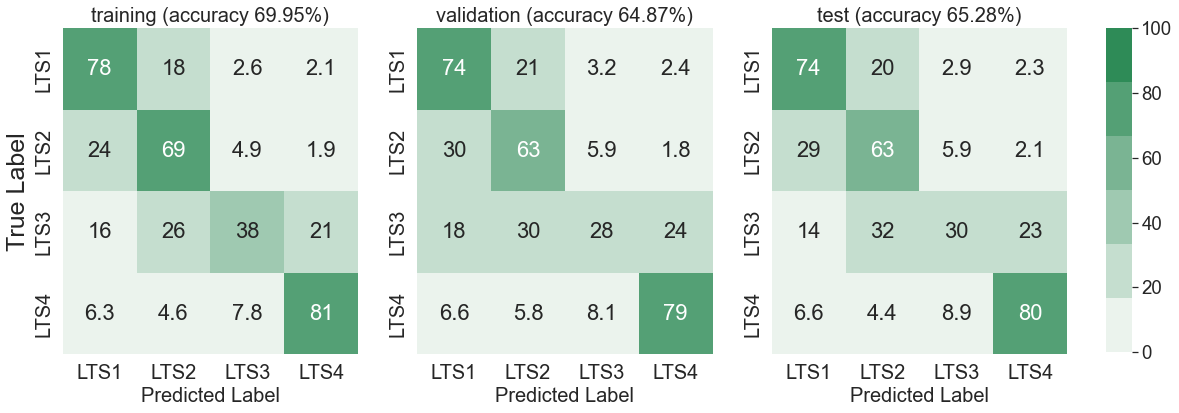

In [115]:
check_conf_mat('8524094_14')

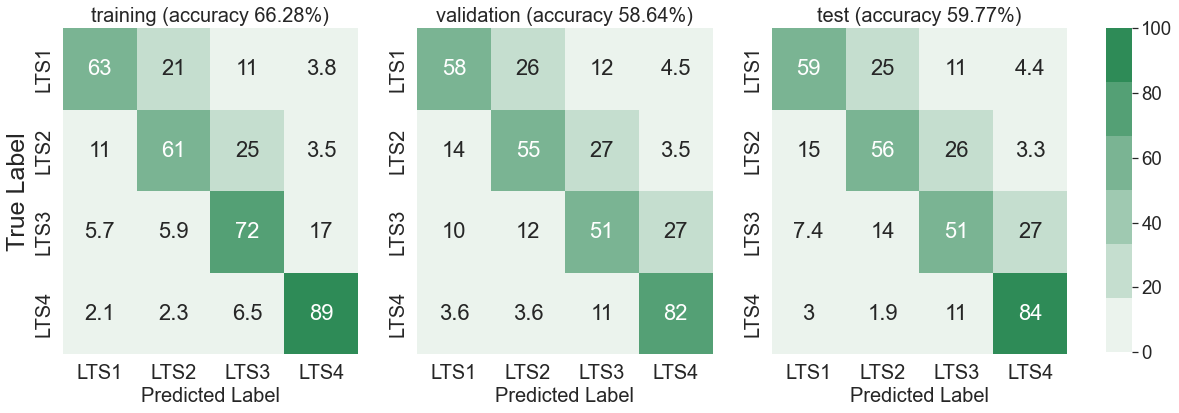

In [12]:
check_conf_mat('8531513_16')

# Res50-FC - evaluation metrics

In [19]:
def check_comp_res(file_name):
    # load data
    res = torch.load(root + f'{file_name}_res.pt')
    # visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax_cbar = fig.add_axes([0.93, 0.13, 0.02, 0.75])
    records = []
    for idx, dataset in enumerate(['training', 'validation', 'test']):
        # extract
        data = res[dataset]['conf_mat'] * 100
        acc = res[dataset]['accuracy']
        aggacc = res[dataset]['aggregated_accuracy']
        mae = res[dataset]['mae']
        mse = res[dataset]['mse']
        ob = res[dataset]['ob']
        kt = res[dataset]['kt'] if dataset == 'training' else res[dataset]['kt']
        if kt > 1:
            kt = kt / (5872 ** 2)
        sns.heatmap(data, ax=ax[idx], annot=True, cmap=sns.light_palette("seagreen", reverse=False), 
                    vmin=0, vmax=100, annot_kws={'fontsize':22}, cbar_ax=ax_cbar)
        ax[idx].set_title(f'{dataset} (accuracy {acc:.2f}%)', size=20)
        ax[idx].set_xticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_yticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_xlabel('Predicted Label', size=20)
        if idx == 0:
            ax[idx].set_ylabel('True Label', size=25)
        if 'fhr' not in res[dataset]:
            records.append([acc, aggacc, ob, mae, mse, kt])
        else:
            fhr = res[dataset]['fhr'] * 100
            flr = res[dataset]['flr'] * 100
            records.append([acc, aggacc, ob, mae, mse, flr, fhr, kt])
    if 'fhr' not in res['training']:
        records = pd.DataFrame(records, columns = ['acc', 'aggacc', 'ob', 'mae', 'mse', 'kt'], index=['training', 'validation', 'test'])
    else:
        records = pd.DataFrame(records, columns = ['acc', 'aggacc', 'ob', 'mae', 'mse', 'flr', 'fhr', 'kt'], index=['training', 'validation', 'test'])
    plt.show()
    return records.round(2)

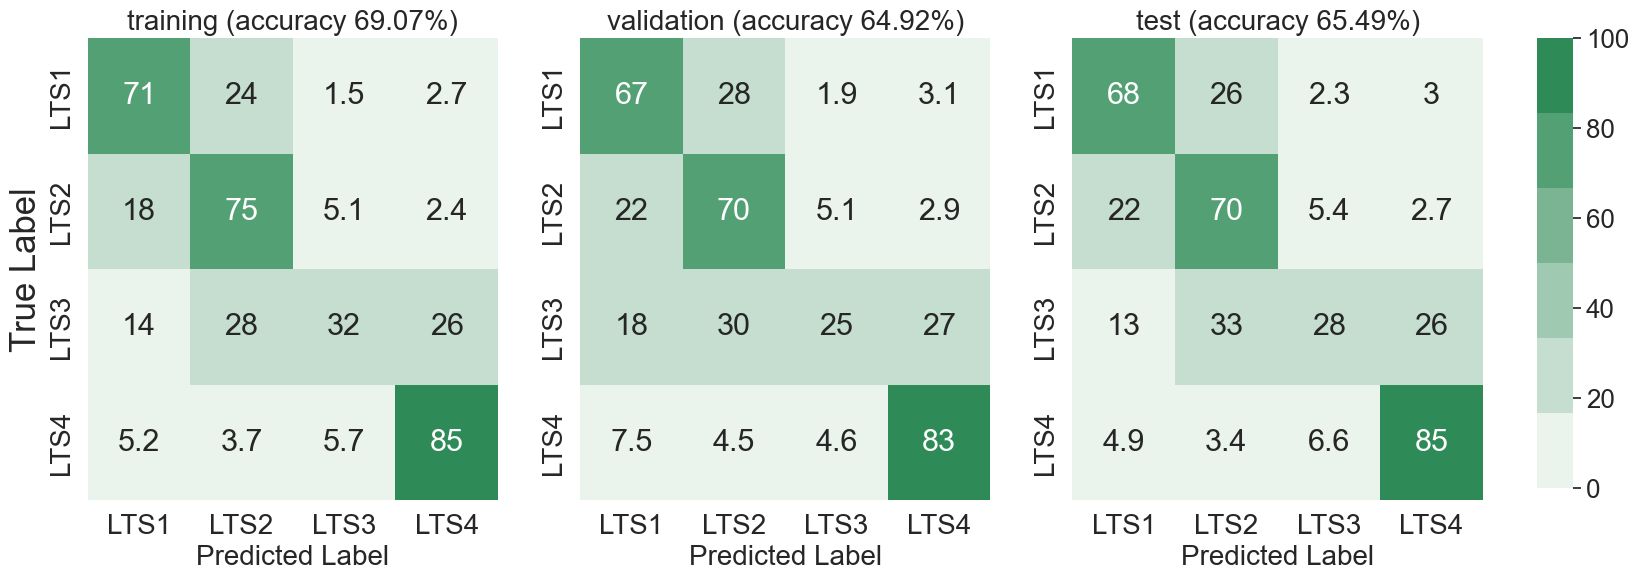

acc  aggacc     ob   mae   mse             flr             fhr  \
training    69.07   89.36  94.73  0.38  0.55  tensor(0.2665)  tensor(0.0570)   
validation  64.92   88.06  93.53  0.44  0.65  tensor(0.3137)  tensor(0.0637)   
test        65.49   88.01  94.23  0.42  0.61  tensor(0.2887)  tensor(0.0660)   

              kt  
training    0.00  
validation  0.31  
test        0.32

In [5]:
# res50 unfrozen1
check_comp_res('8777104_5')

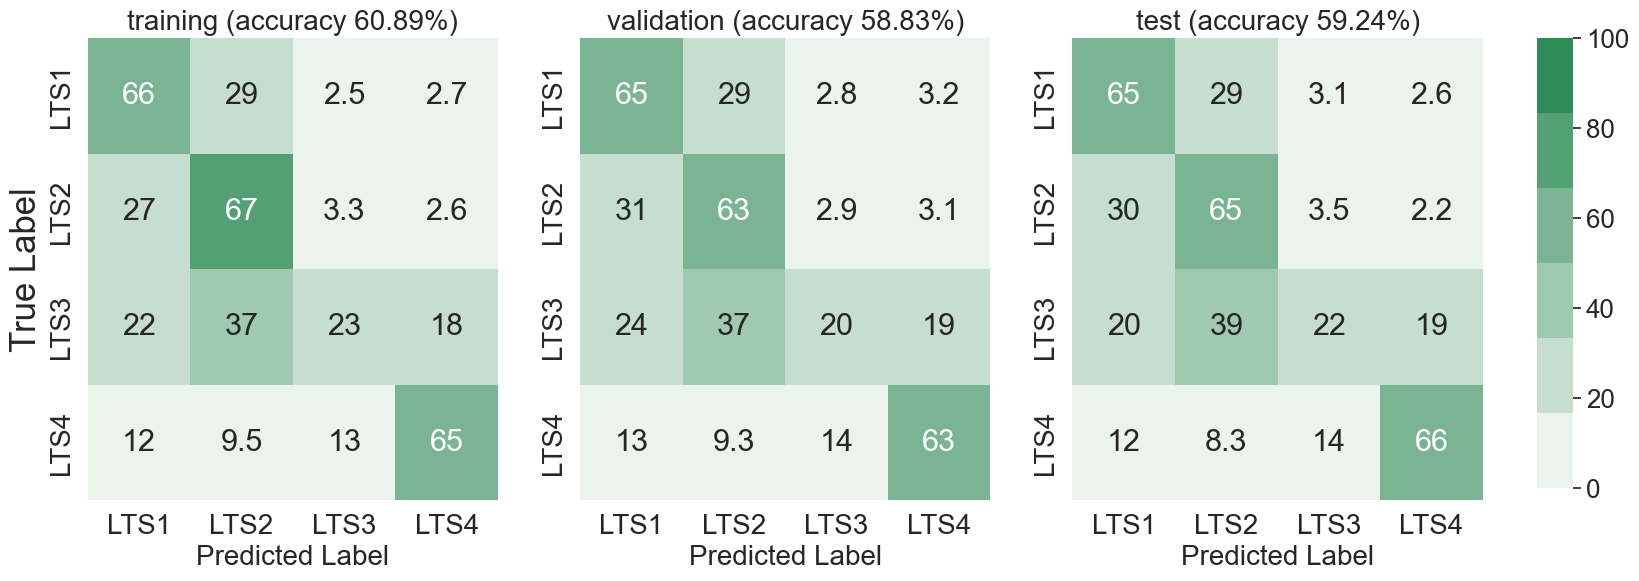

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    60.89   86.10  91.89  0.50  0.75  41.17  5.49  0.00
validation  58.83   85.78  91.21  0.53  0.81  43.08  5.96  0.27
test        59.24   85.63  92.00  0.51  0.77  41.62  5.68  0.28

In [8]:
# res50 frozen
check_comp_res('8777107_38')

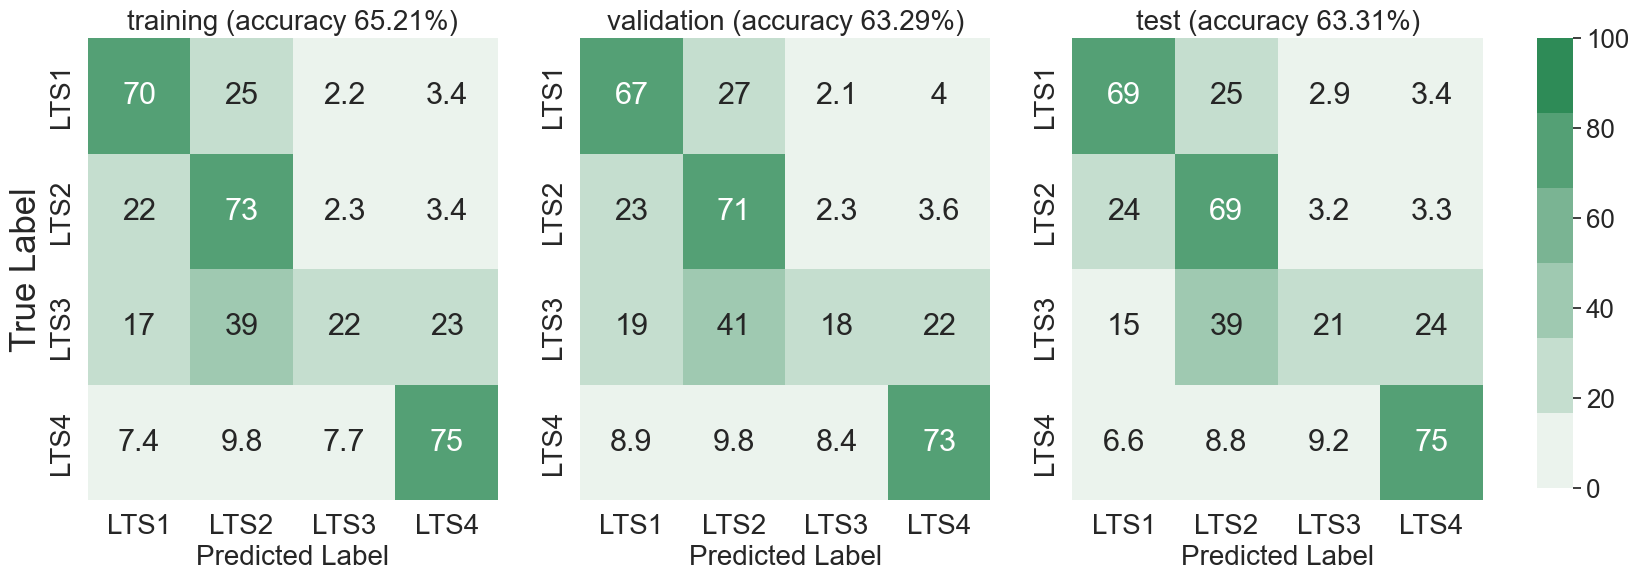

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    65.21   86.80  92.49  0.44  0.68  37.72  5.64  0.00
validation  63.29   86.23  91.96  0.47  0.74  40.93  6.00  0.29
test        63.31   86.24  92.58  0.46  0.70  36.83  6.40  0.30

In [9]:
# MoCo
check_comp_res('8776347_24')

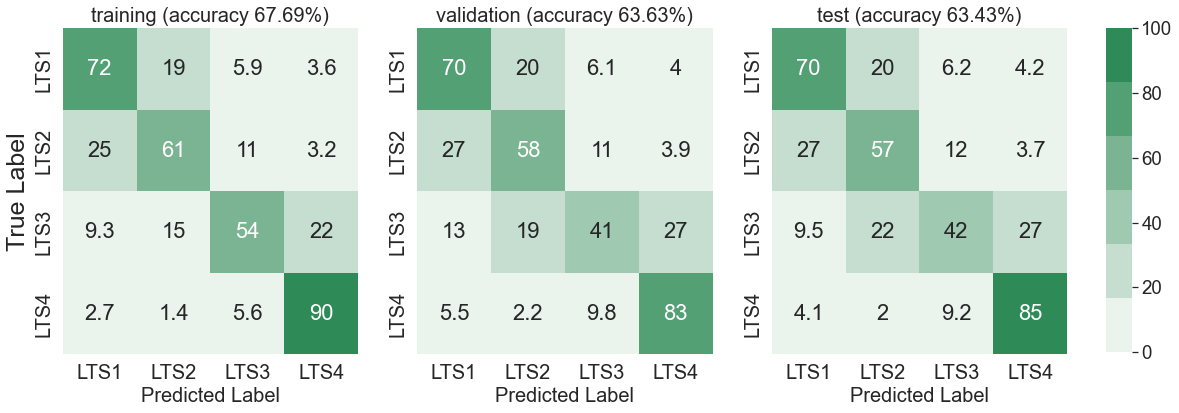

acc  aggacc     ob   mae   mse    kt
training    67.69   87.49  93.32  0.41  0.61  0.00
validation  63.63   85.70  92.01  0.47  0.71  0.31
test        63.43   85.36  92.49  0.46  0.70  0.31

In [13]:
# res50 biased, unfrozen
check_comp_res('8780600_3')

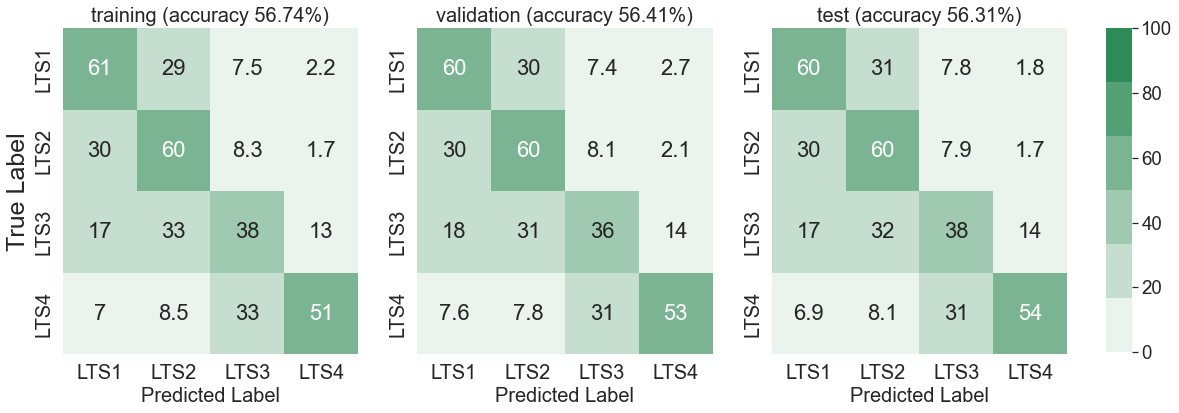

acc  aggacc     ob   mae   mse    kt
training    56.74   84.51  91.55  0.53  0.77  0.00
validation  56.41   84.57  91.21  0.54  0.80  0.27
test        56.31   84.59  91.61  0.54  0.76  0.28

In [19]:
# Res50, frozen, biased
check_comp_res('8782406_3')

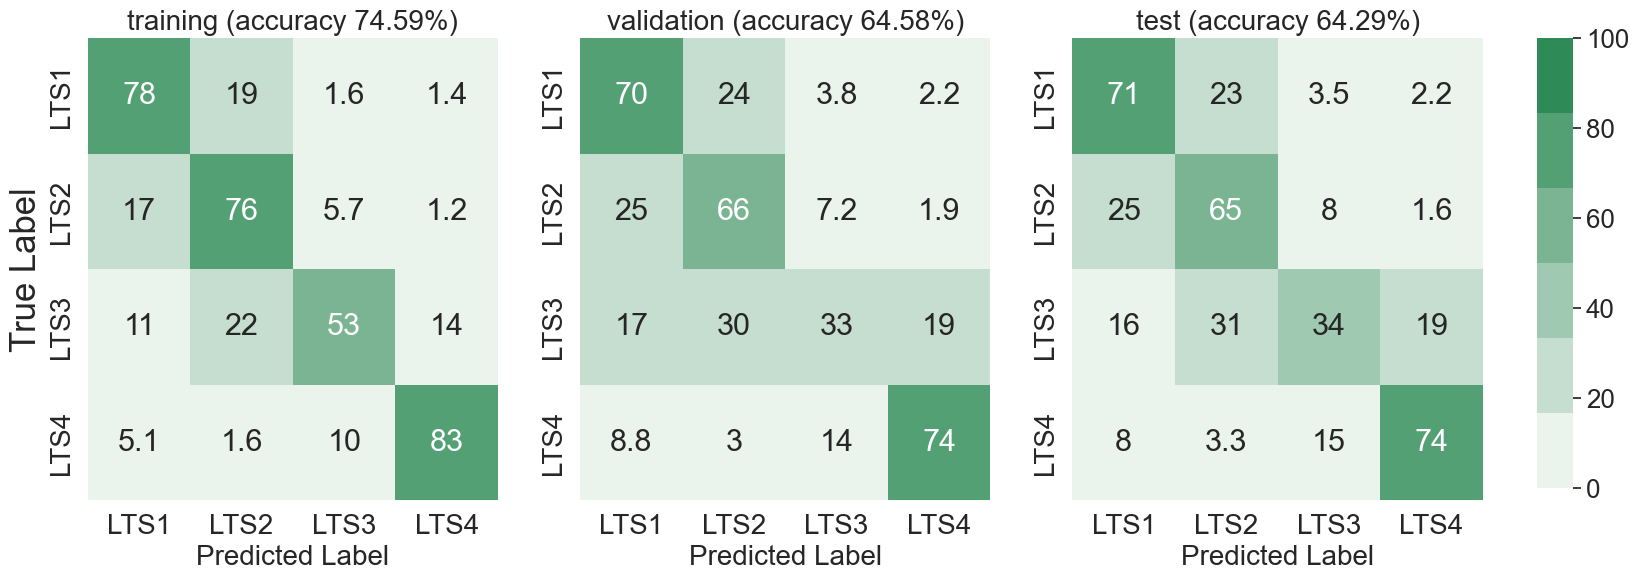

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    74.59   91.43  96.21  0.30  0.42  20.95  4.75  0.00
validation  64.58   87.35  93.55  0.44  0.64  31.14  7.36  0.31
test        64.29   86.82  93.77  0.44  0.63  31.13  7.46  0.31

In [10]:
# MoCo-C
check_comp_res('8775783_29')

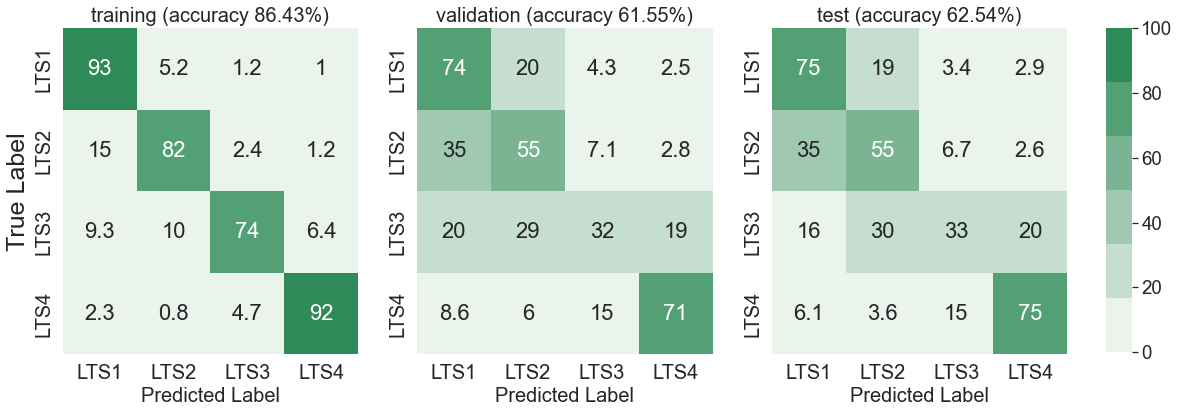

acc  aggacc     ob   mae   mse    kt
training    86.43   95.00  97.13  0.17  0.26  0.00
validation  61.55   86.26  92.25  0.48  0.71  0.29
test        62.54   86.99  93.34  0.46  0.67  0.31

In [21]:
# MoCo-C
check_comp_res('8782883_4')

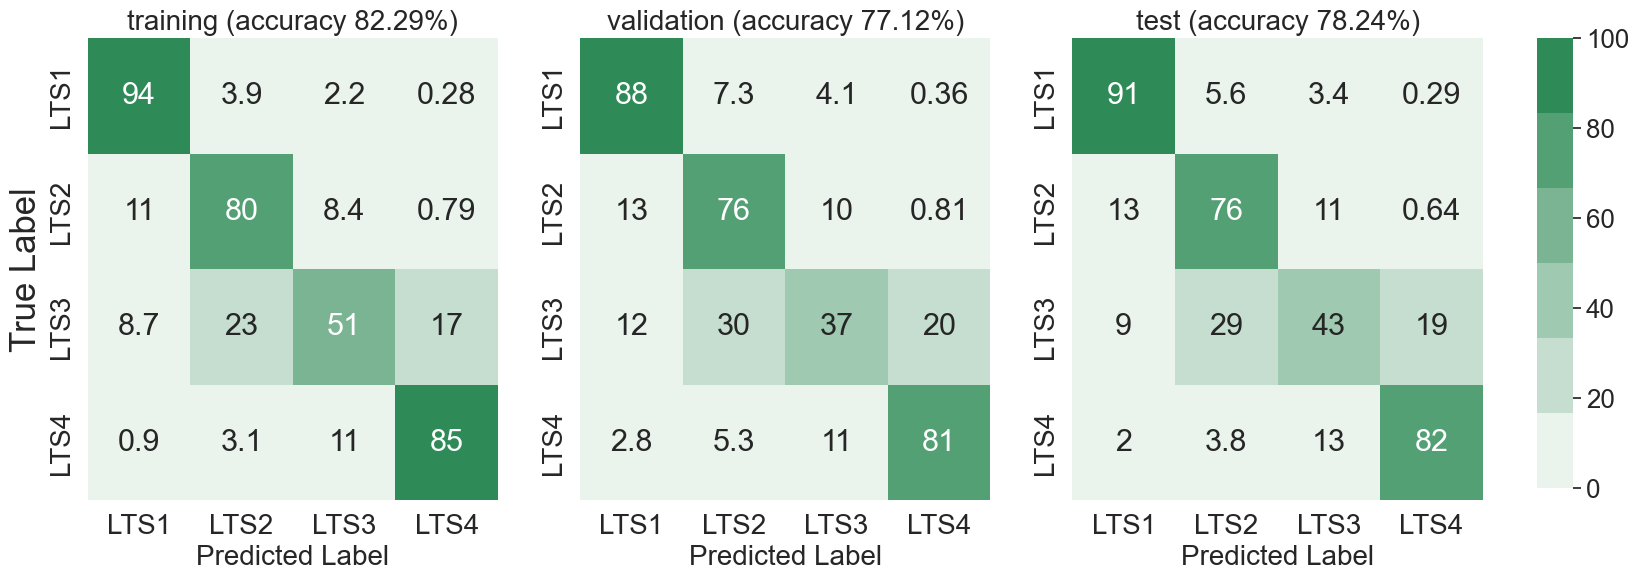

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    82.29   91.28  97.15  0.21  0.27  18.88  5.59  0.00
validation  77.12   88.29  95.56  0.28  0.38  26.63  7.45  0.38
test        78.24   88.97  96.46  0.26  0.34  23.31  7.12  0.39

In [15]:
# End2End - image + n_lanes + speed
check_comp_res('8836387_23')

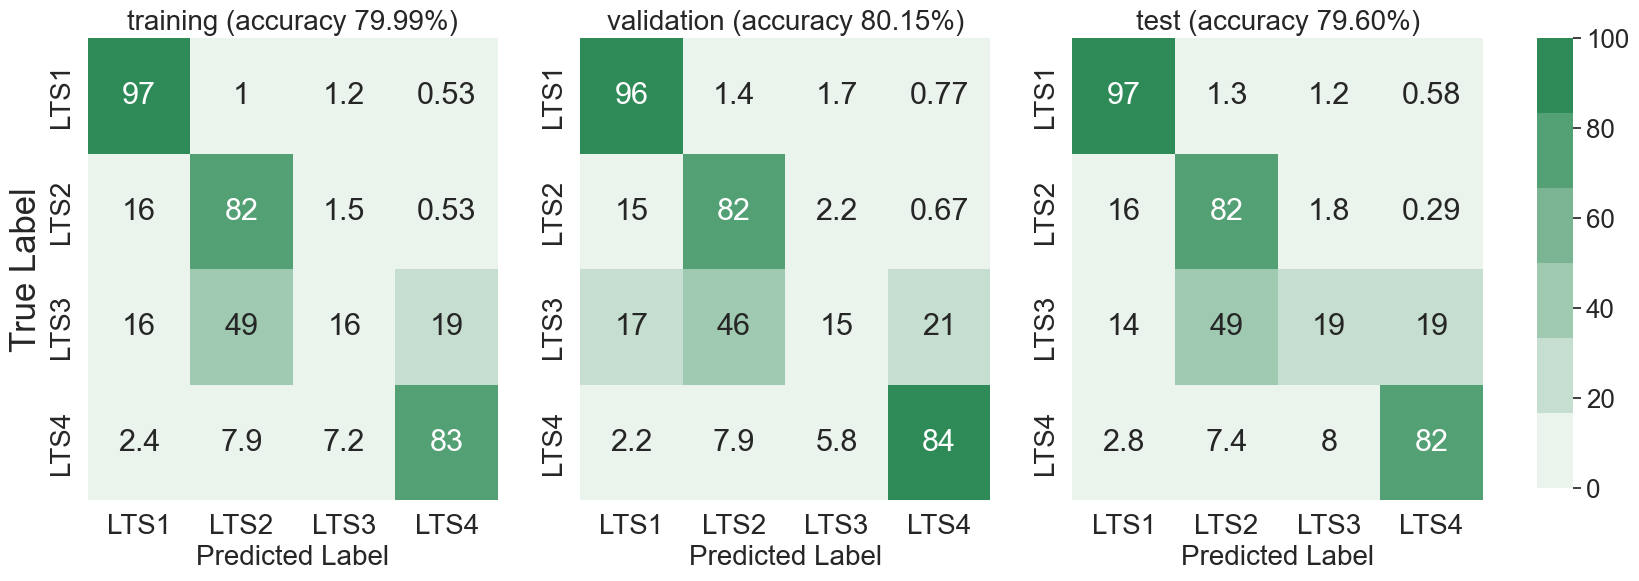

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    79.99   89.30  95.99  0.25  0.34  39.32  1.88  0.0
validation  80.15   89.29  95.61  0.25  0.36  38.87  2.65  0.4
test        79.60   89.12  96.22  0.25  0.34  39.01  1.91  0.4

In [17]:
# End2End frozen - image + n_lanes + speed
check_comp_res('8836388_45')

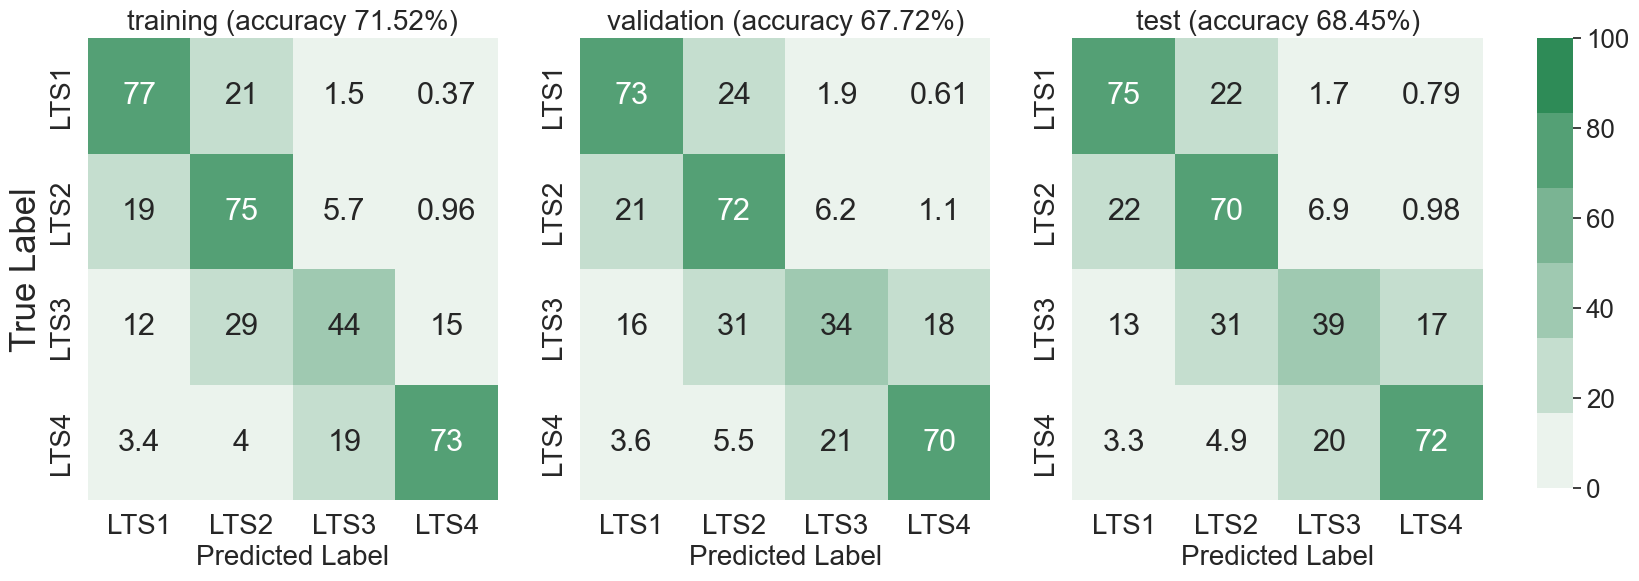

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    71.52   90.82  96.52  0.32  0.42  25.63  4.11  0.00
validation  67.72   89.72  95.68  0.37  0.48  29.84  4.69  0.33
test        68.45   89.46  96.05  0.36  0.47  27.89  5.01  0.33

In [21]:
# End2End - image + road_type + cyc_ifnras
check_comp_res('8836394_15')

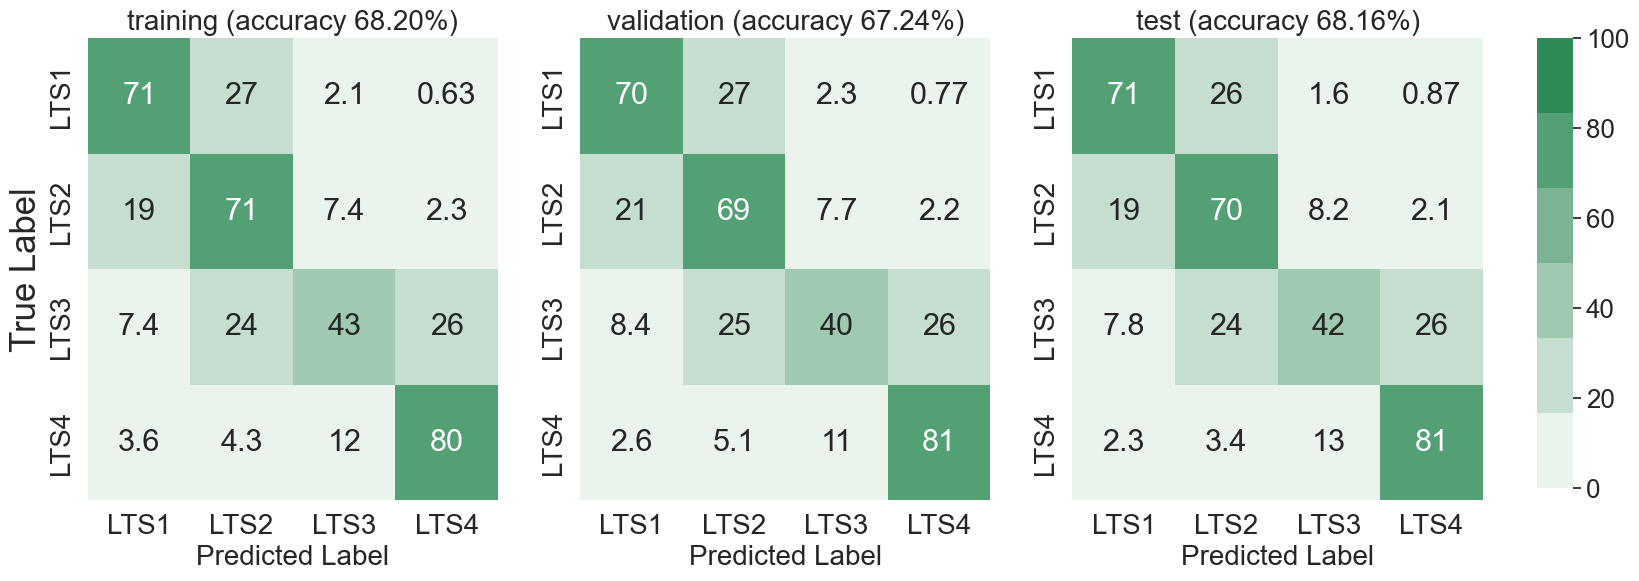

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    68.20   90.63  96.27  0.36  0.46  20.56  5.92  0.00
validation  67.24   90.40  96.12  0.37  0.47  21.42  6.22  0.33
test        68.16   90.55  96.61  0.36  0.45  20.14  6.04  0.34

In [22]:
# End2End frozen - image + road_type + cyc_ifnras
check_comp_res('8836393_49')

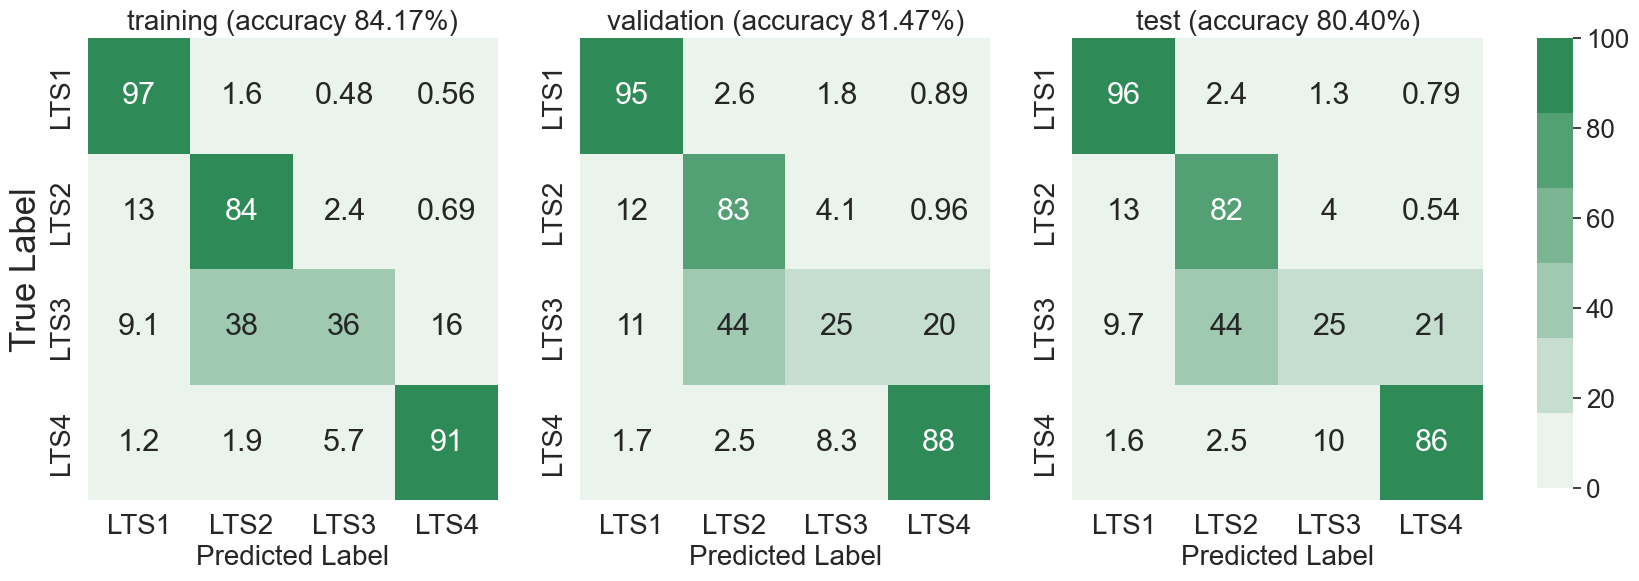

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    84.17   92.21  97.85  0.18  0.24  26.71  1.96  0.00
validation  81.47   90.07  96.80  0.22  0.31  31.45  3.77  0.41
test        80.40   90.02  97.22  0.23  0.30  31.27  3.19  0.41

In [28]:
# Sup MoCo + n_lanes + speed_limit
check_comp_res('8836483_94')

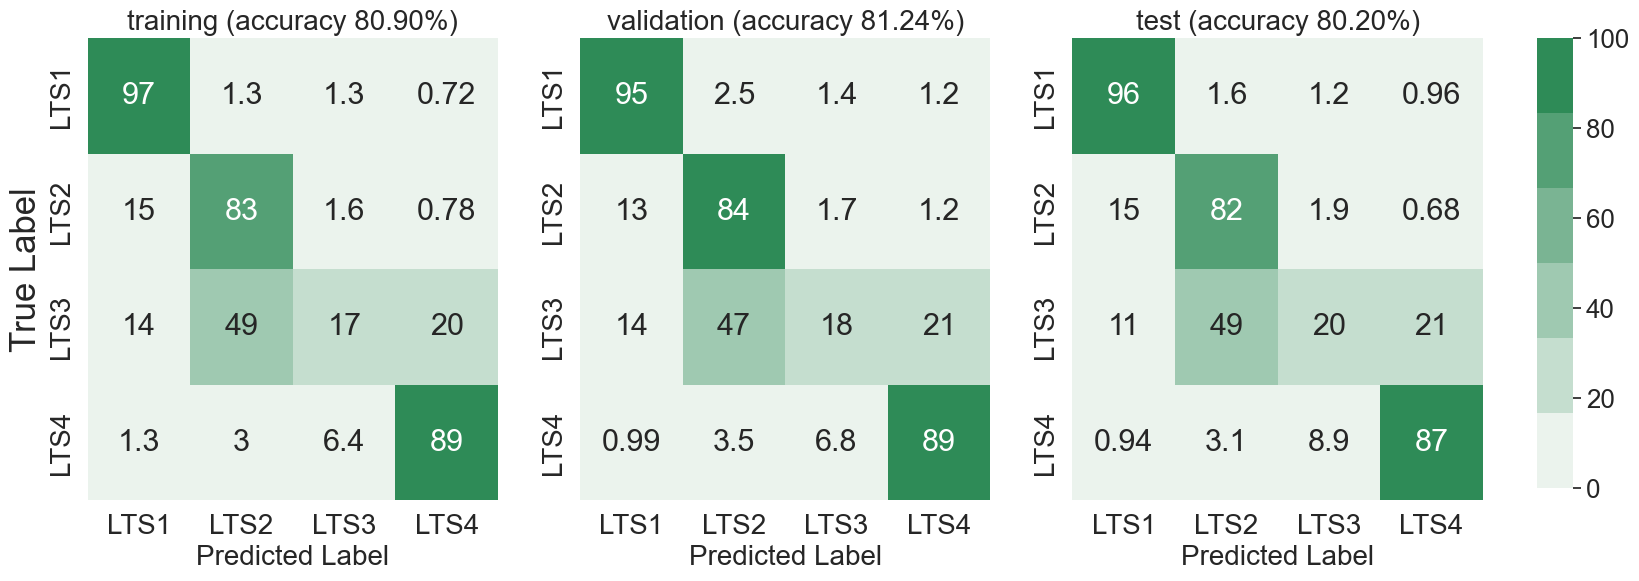

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    80.90   89.91  96.64  0.23  0.31  35.69  2.20  0.0
validation  81.24   90.06  96.32  0.23  0.33  35.27  2.69  0.4
test        80.20   89.89  96.99  0.23  0.31  34.44  2.36  0.4

In [30]:
# MoCo + n_lanes + speed_limit
check_comp_res('8836482_99')

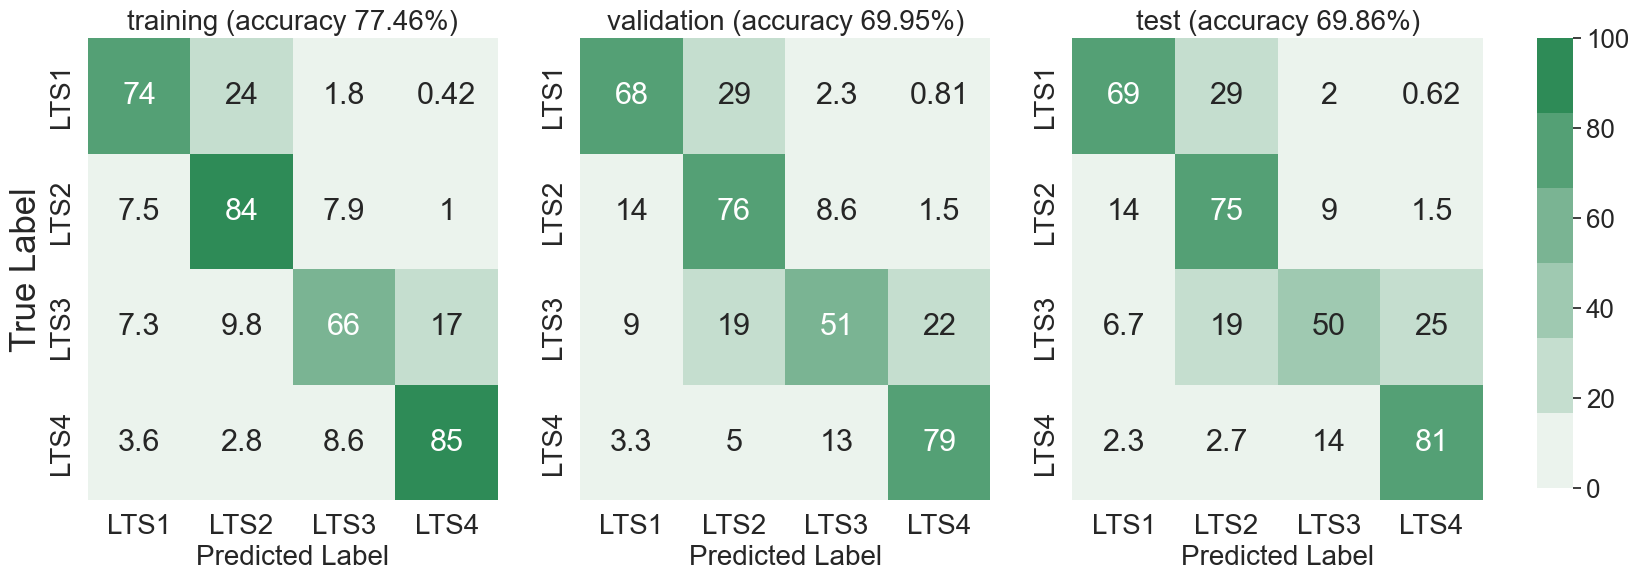

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    77.46   93.09  97.10  0.26  0.34  12.12  5.30  0.00
validation  69.95   90.96  96.24  0.34  0.45  18.67  6.29  0.34
test        69.86   91.35  97.00  0.34  0.42  16.27  6.22  0.35

In [31]:
# Sup MoCo + road_type + cyc_ifnras
check_comp_res('8836484_89')

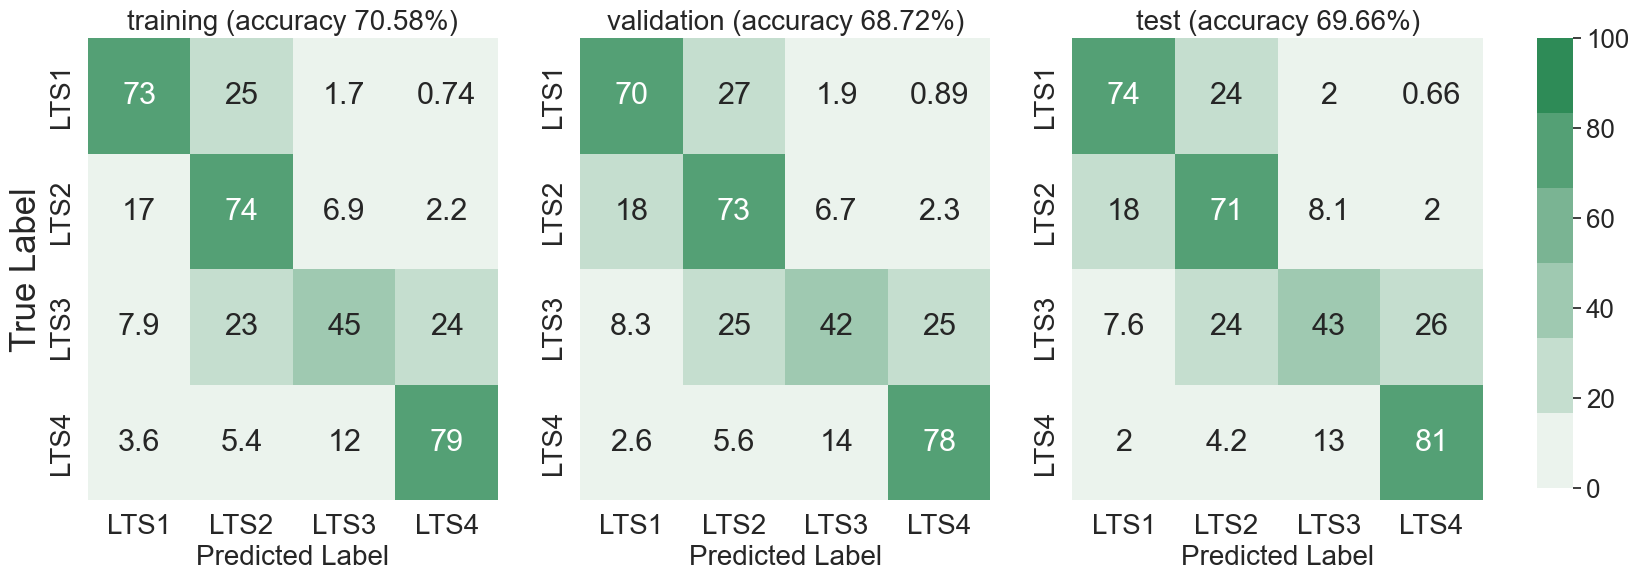

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    70.58   90.93  96.25  0.34  0.44  20.75  5.48  0.00
validation  68.72   90.75  96.17  0.36  0.46  21.81  5.65  0.33
test        69.66   90.57  96.53  0.34  0.43  19.93  6.09  0.34

In [32]:
# MoCo + road_type + cyc_ifnras
check_comp_res('8836485_99')

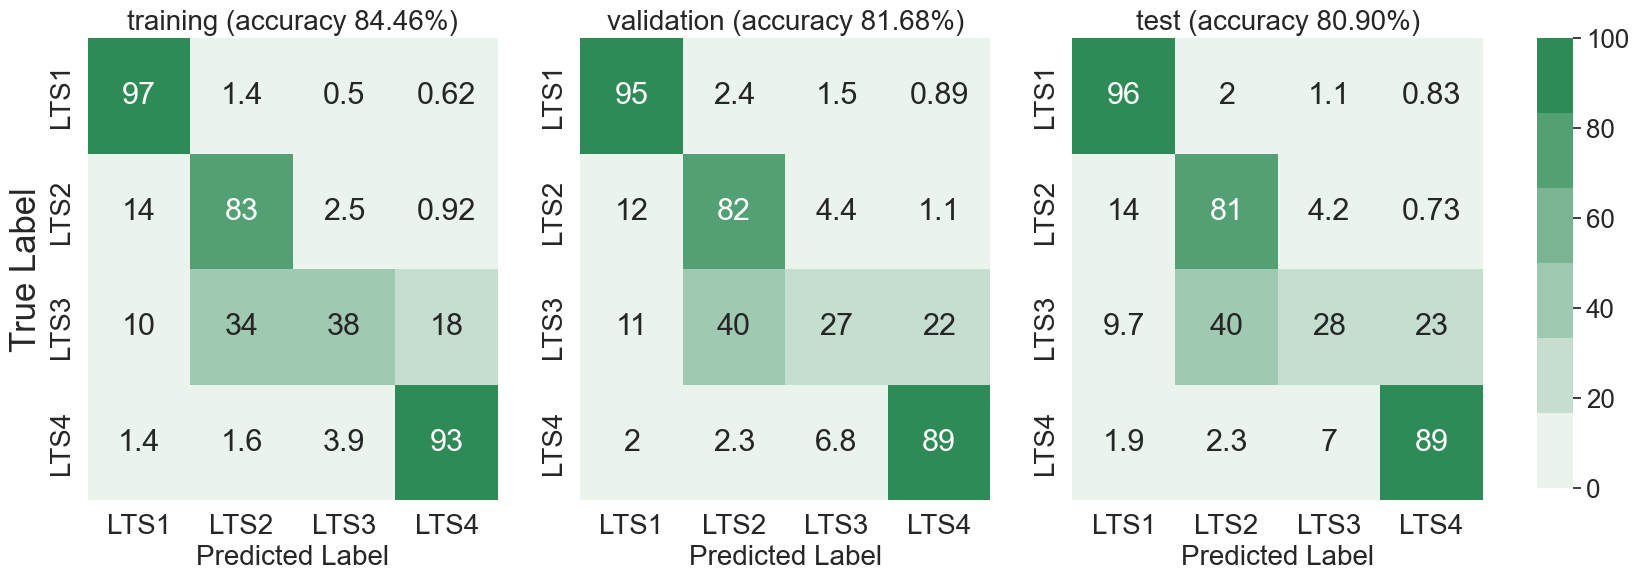

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    84.46   92.46  97.61  0.18  0.25  24.98  2.17  0.00
validation  81.68   90.43  96.80  0.22  0.31  29.46  3.88  0.41
test        80.90   90.43  97.19  0.22  0.30  29.23  3.30  0.41

In [51]:
# SupMoCo + n_lanes + speed_limit
check_comp_res('8837319_114')

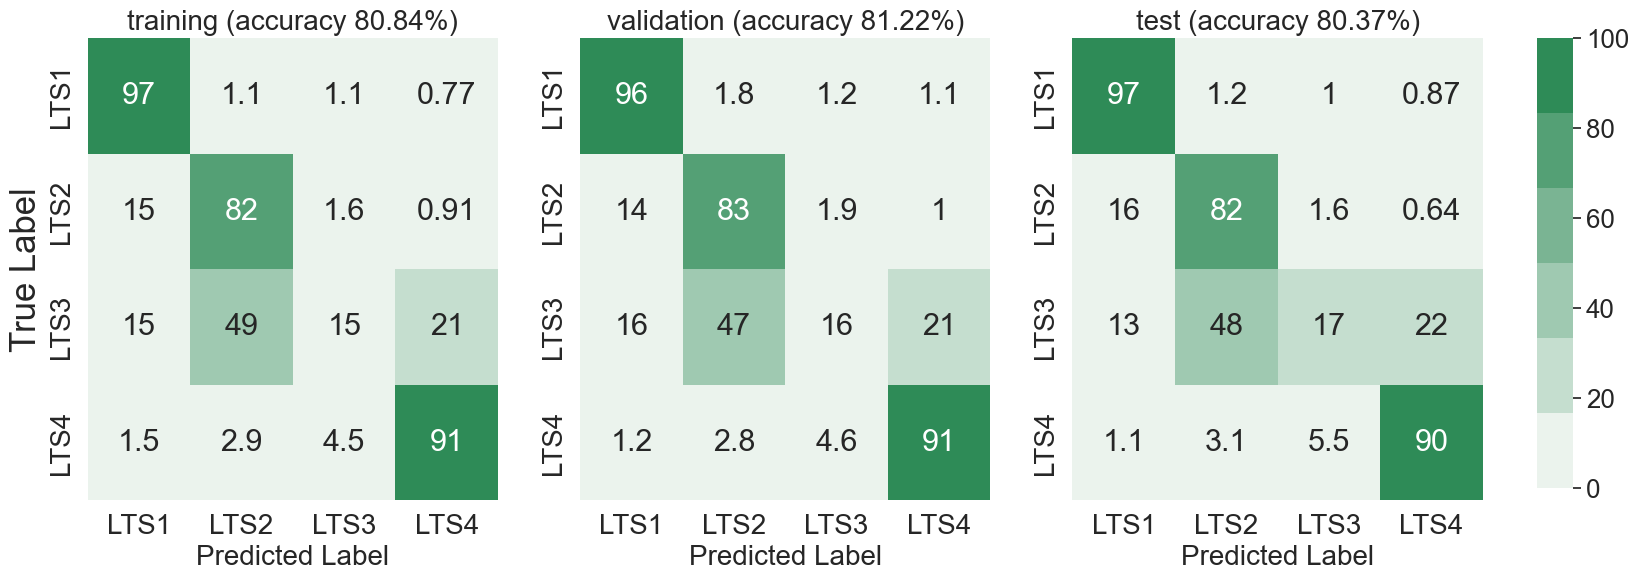

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    80.84   89.83  96.59  0.23  0.32  36.17  2.16  0.0
validation  81.22   90.11  96.37  0.23  0.32  35.65  2.52  0.4
test        80.37   89.94  96.87  0.23  0.31  35.21  2.04  0.4

In [42]:
# MoCo + n_lanes + speed_limit
check_comp_res('8837321_59')

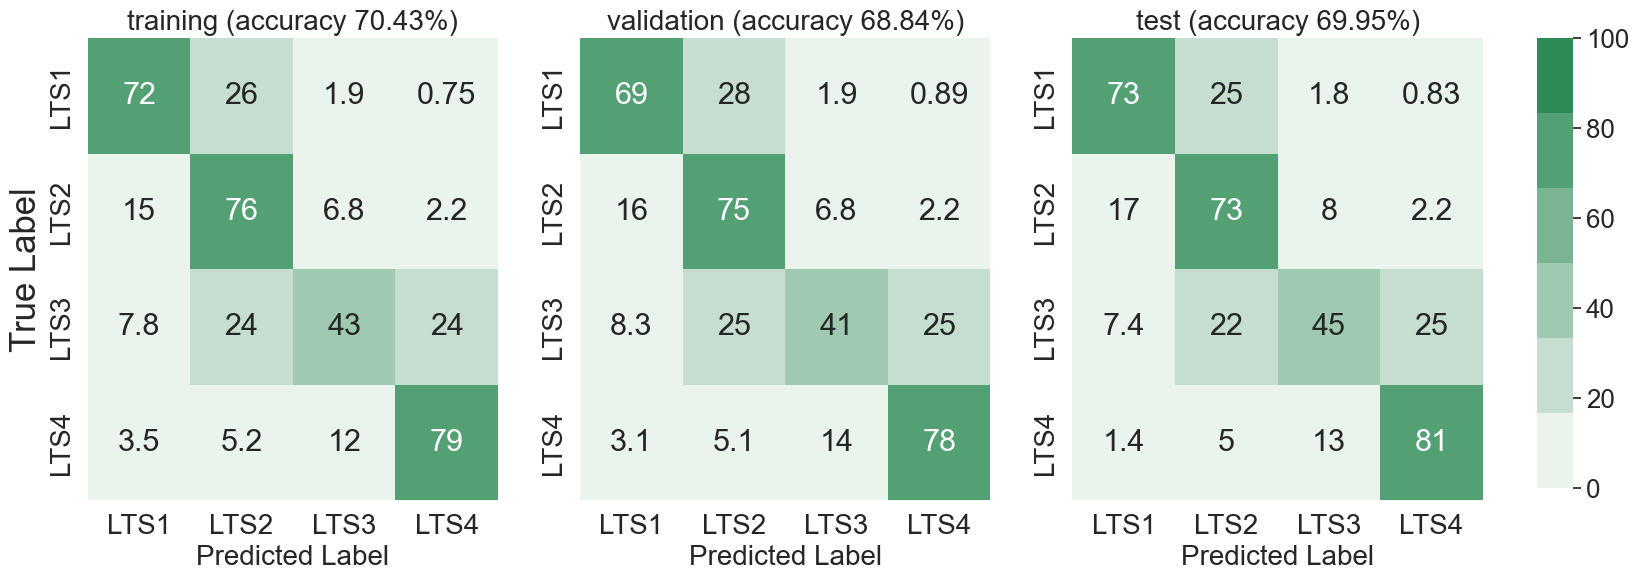

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    70.43   90.73  96.21  0.34  0.44  21.29  5.56  0.00
validation  68.84   90.72  96.20  0.36  0.46  21.96  5.65  0.34
test        69.95   90.69  96.46  0.34  0.43  19.30  6.13  0.35

In [57]:
# MoCo + road type + cyc infras 
check_comp_res('8837322_59')

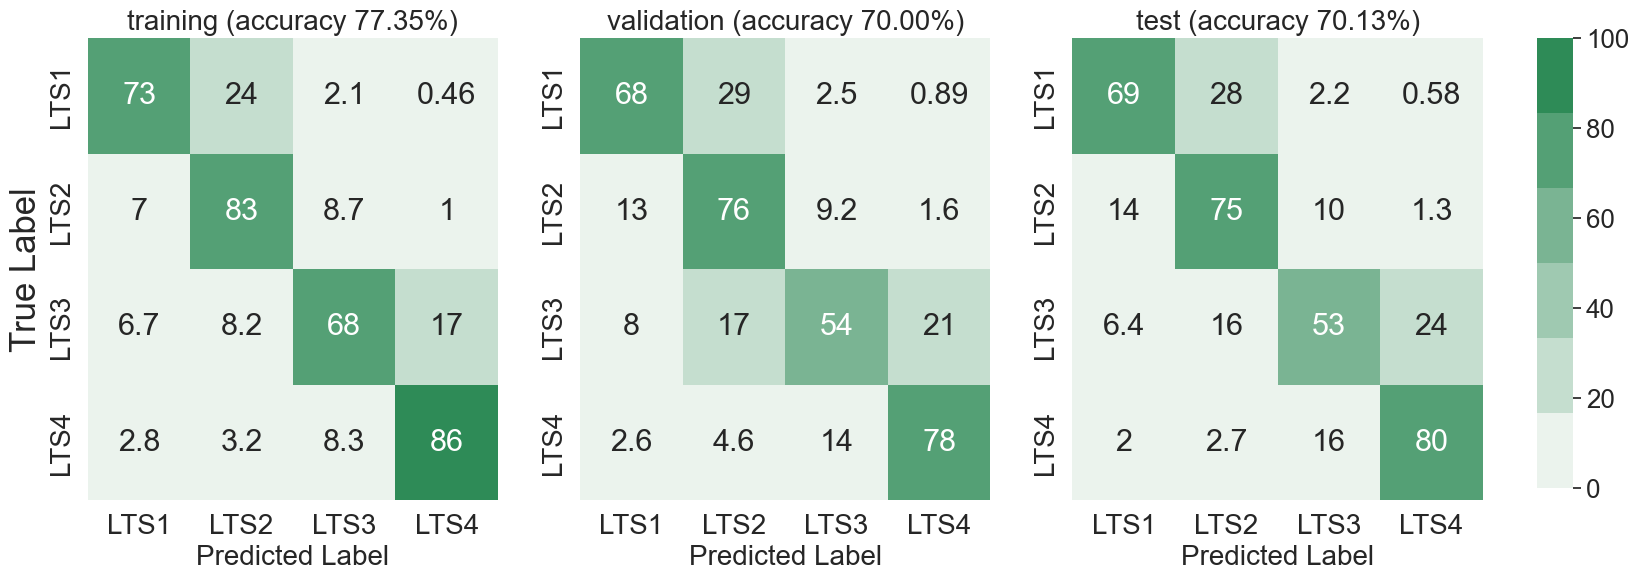

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    77.35   92.97  97.08  0.26  0.34  10.82  5.86  0.00
validation  70.00   90.99  96.29  0.34  0.44  16.68  6.81  0.34
test        70.13   91.44  97.02  0.33  0.41  14.37  6.71  0.35

In [56]:
# SupMoCo + road type + cyc infras (unfinished new exp)
check_comp_res('8837323_114')

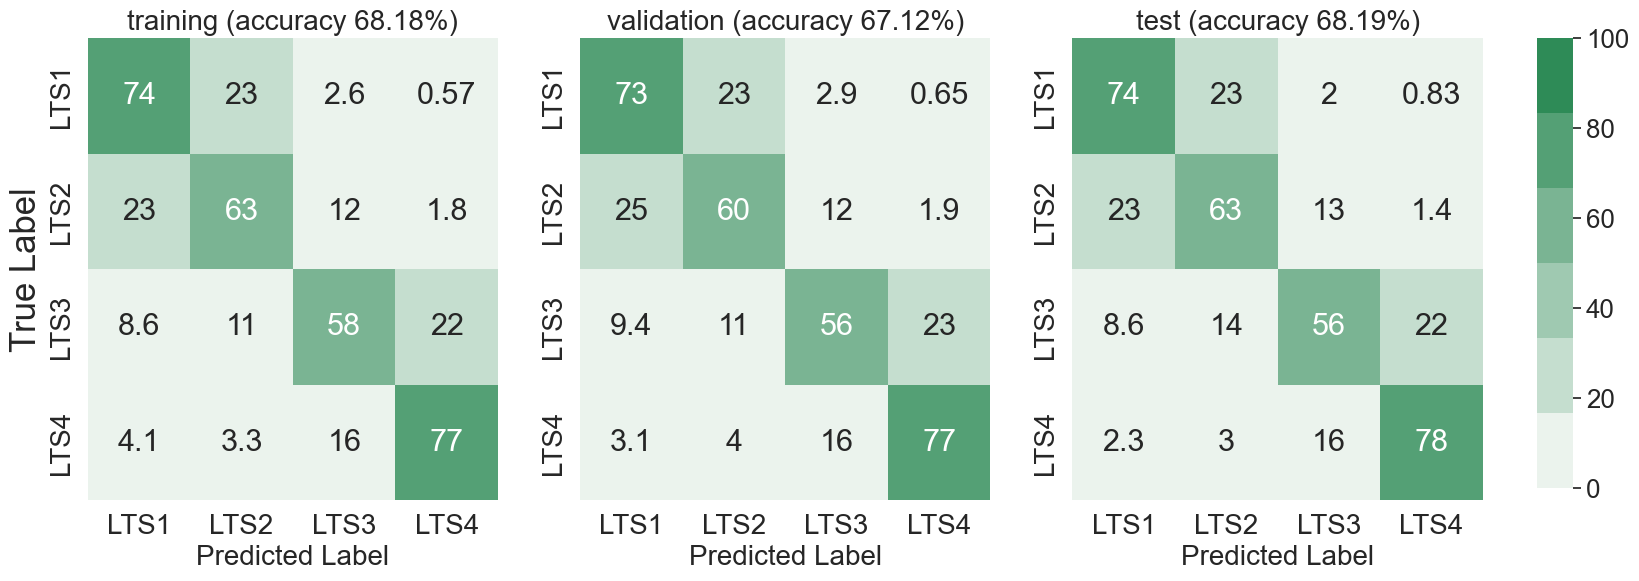

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    68.18   90.35  96.15  0.36  0.47  14.17  8.26  0.00
validation  67.12   90.31  96.00  0.37  0.48  14.31  8.37  0.33
test        68.19   90.38  96.63  0.36  0.45  14.58  8.04  0.34

In [45]:
# End2end frozen + road type + cyc infras (unfinished new exp)
check_comp_res('8837239_65')

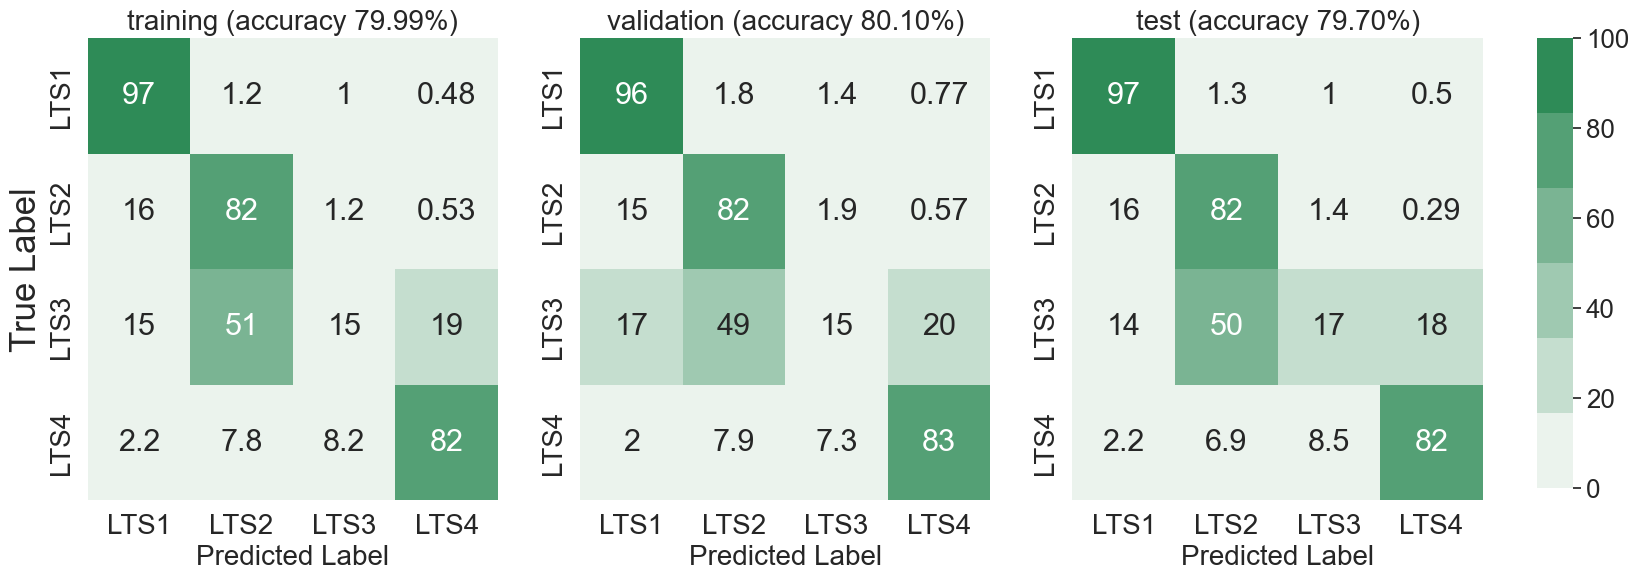

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    79.99   89.34  96.19  0.24  0.34  40.01  1.61  0.0
validation  80.10   89.39  95.86  0.25  0.35  39.71  2.28  0.4
test        79.70   89.24  96.42  0.24  0.33  39.51  1.59  0.4

In [46]:
# End2end frozen + road type + cyc infras (unfinished new exp)
check_comp_res('8837237_69')

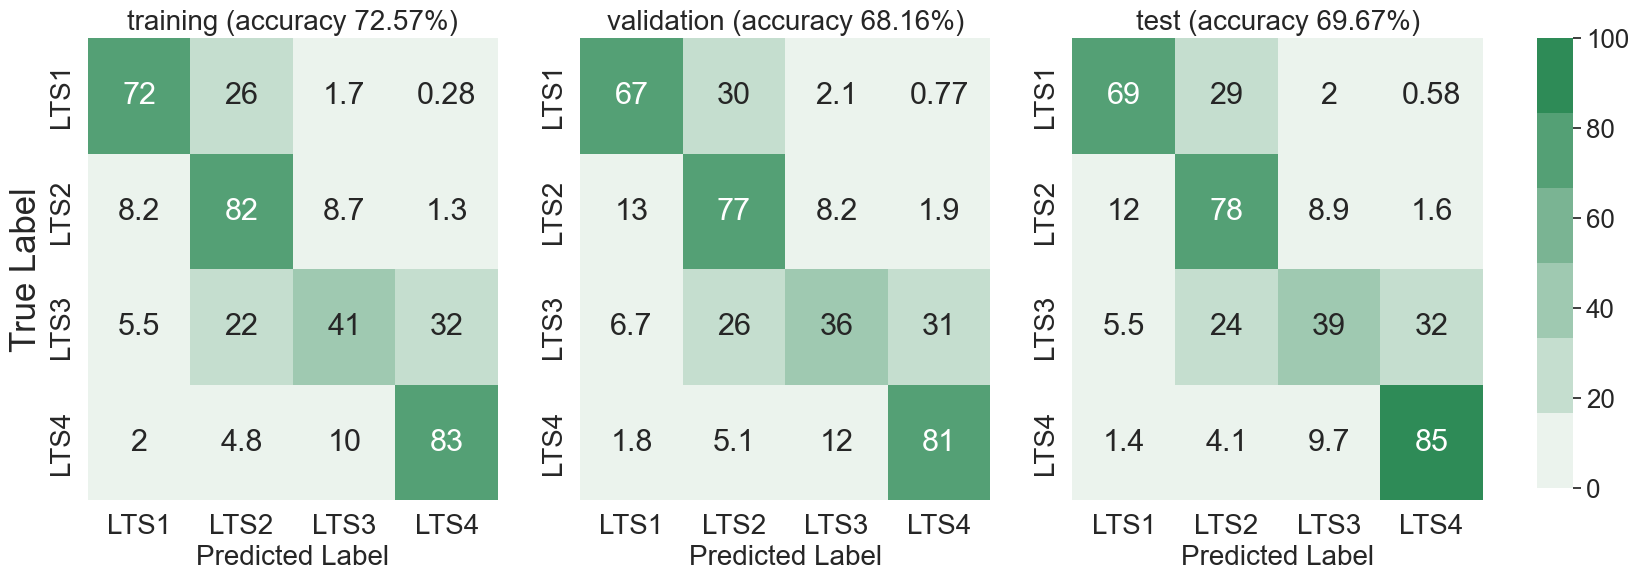

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    72.57   91.49  97.27  0.31  0.37  17.64  5.69  0.00
validation  68.16   90.52  96.59  0.36  0.45  20.96  6.20  0.34
test        69.67   90.81  97.07  0.34  0.41  18.52  6.22  0.35

In [20]:
# MoCo-O-ratio + road type + cyc infras
check_comp_res('8851279_84')

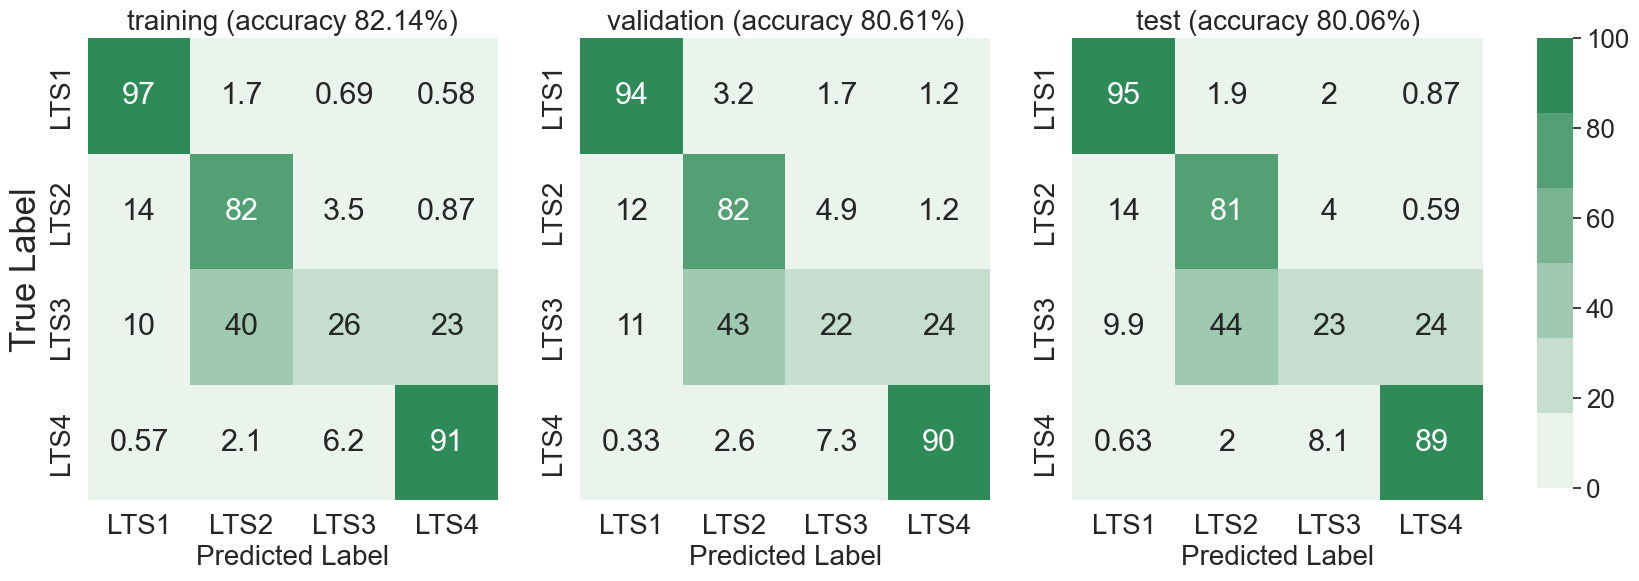

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    82.14   91.28  97.61  0.21  0.27  28.29  2.69  0.0
validation  80.61   89.89  96.73  0.23  0.32  30.15  4.38  0.4
test        80.06   89.82  97.02  0.23  0.31  30.63  3.66  0.4

In [21]:
# MoCo-O-ratio + n_lanes + speed_limit
check_comp_res('8851280_184')

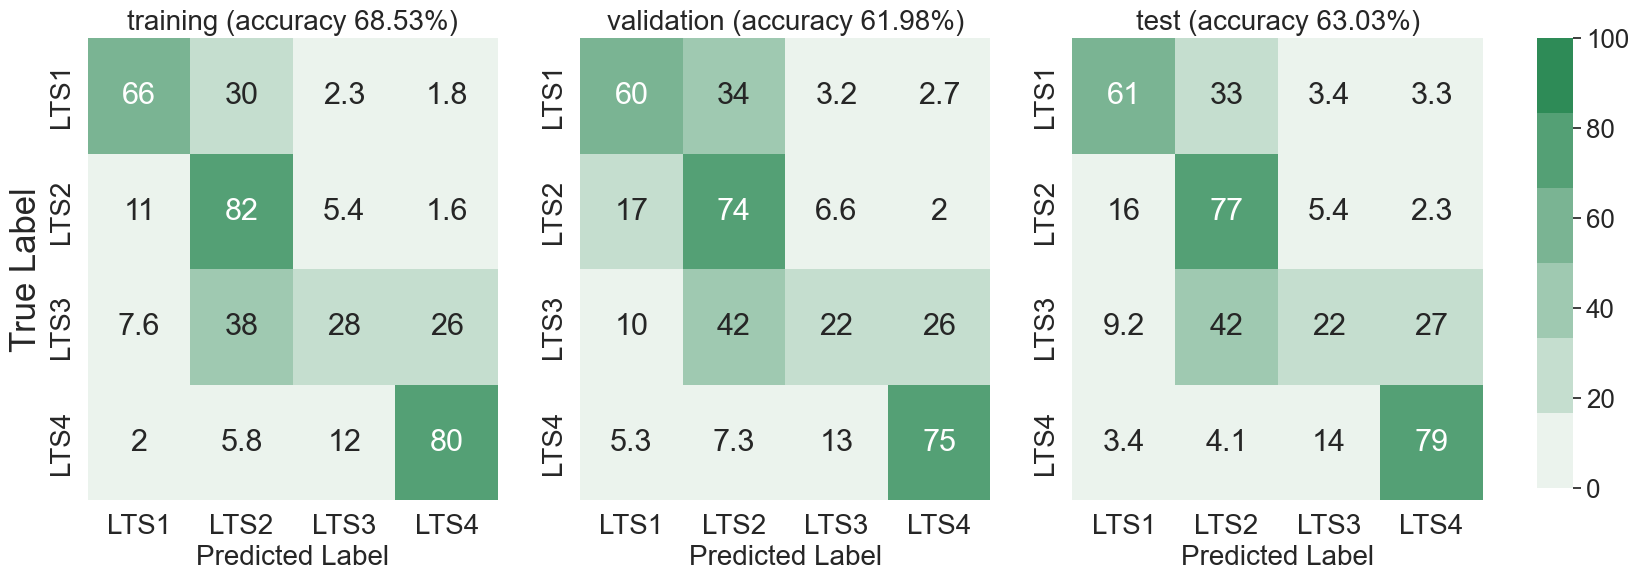

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    68.53   89.27  95.96  0.36  0.48  28.06  5.39  0.00
validation  61.98   86.99  94.31  0.45  0.63  33.59  7.12  0.30
test        63.03   86.97  94.40  0.44  0.62  31.41  7.16  0.31

In [22]:
# MoCo-O-ratio - 480
check_comp_res('8851281_194')

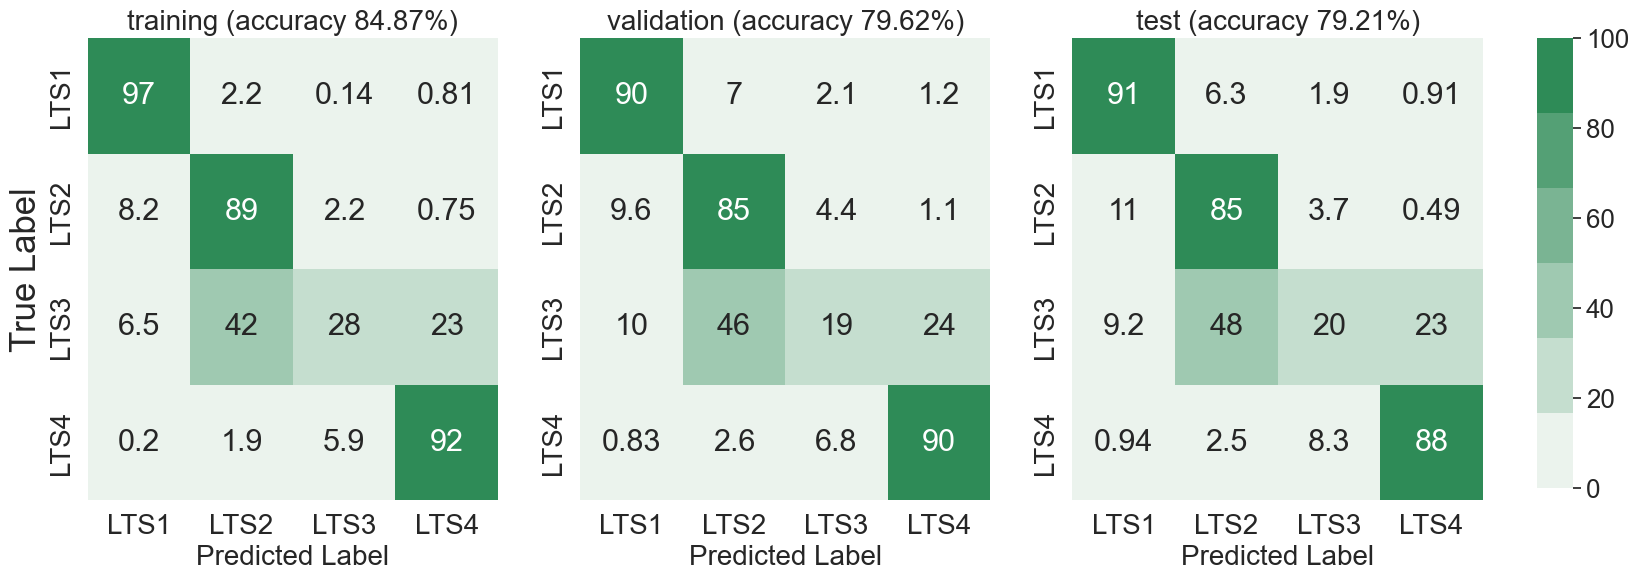

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    84.87   92.18  98.29  0.17  0.22  27.05  1.89  0.0
validation  79.62   89.60  96.66  0.24  0.33  31.91  4.25  0.4
test        79.21   89.48  97.09  0.24  0.32  32.75  3.44  0.4

In [30]:
# MoCo-O-ratio - 640 + n_lanes + speed_limit
check_comp_res('8855875_124')

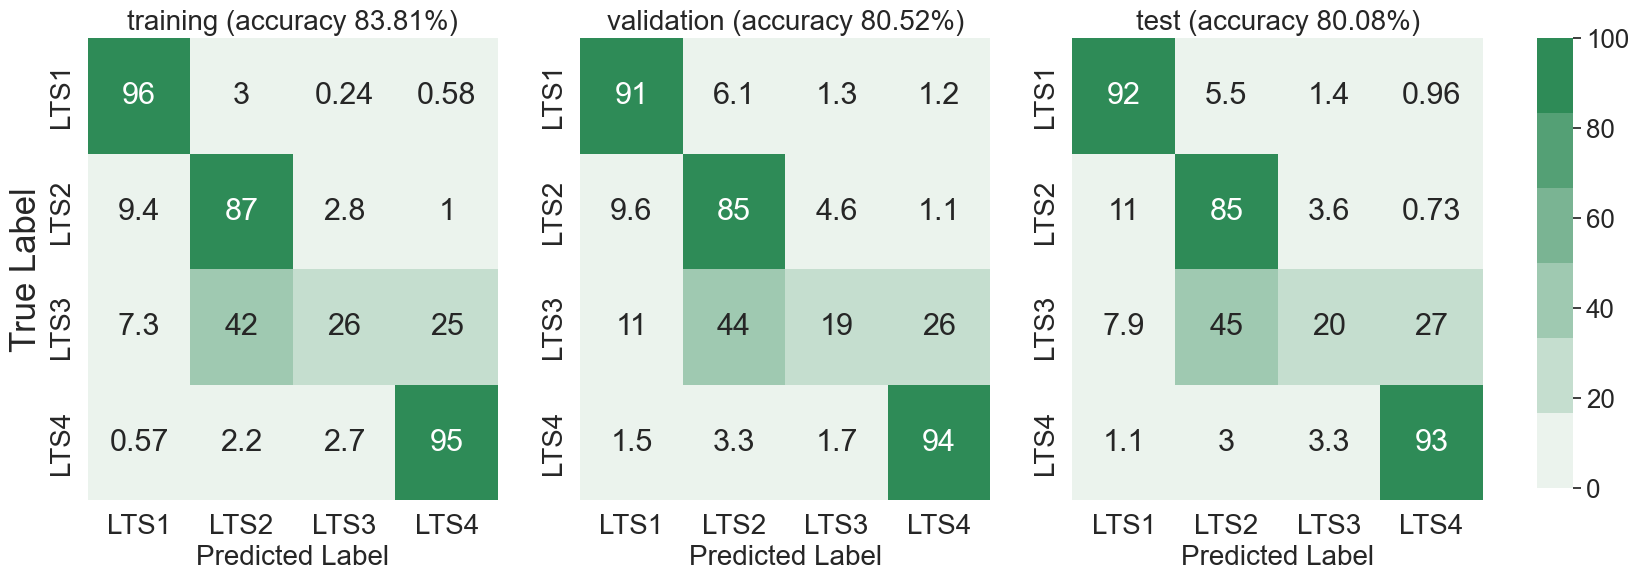

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    83.81   91.86  98.07  0.18  0.24  27.44  2.19  0.0
validation  80.52   89.83  96.70  0.23  0.33  31.75  3.99  0.4
test        80.08   90.11  97.28  0.23  0.31  30.70  3.26  0.4

In [31]:
# MoCo-O-ratio - 580 + n_lanes + speed_limit
check_comp_res('8855876_119')

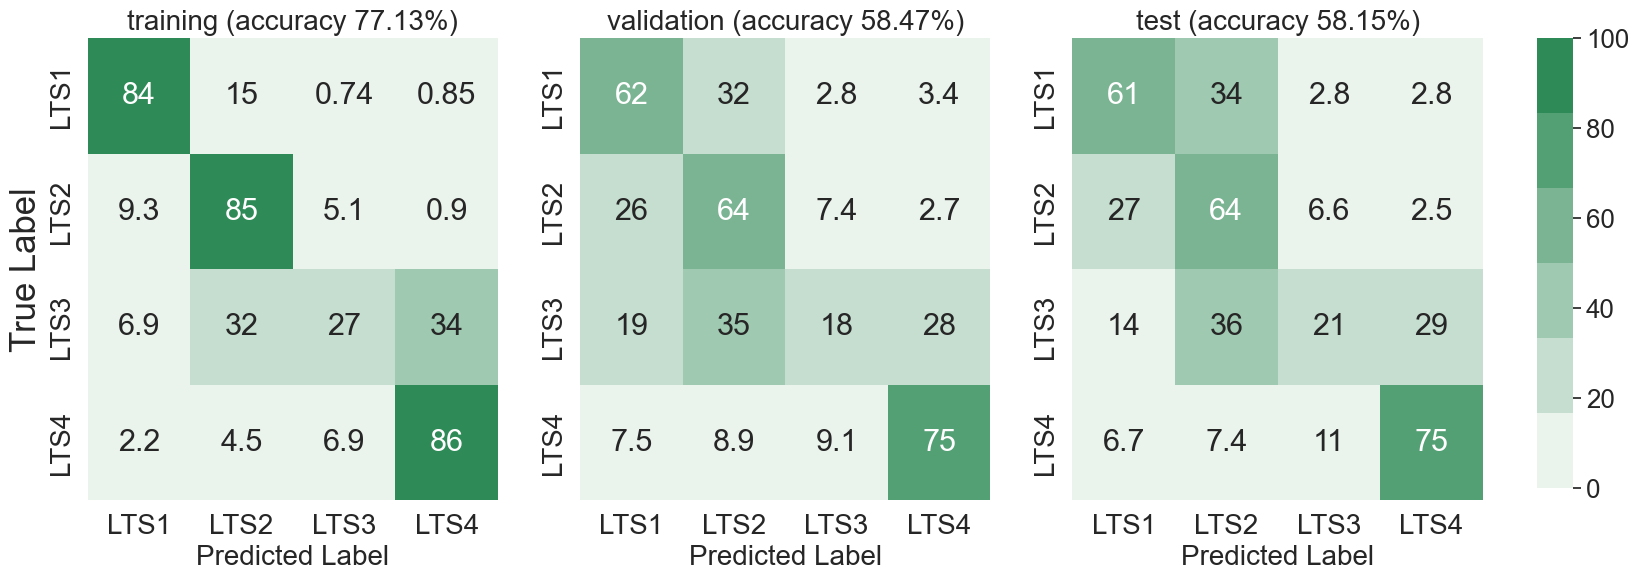

acc  aggacc     ob   mae   mse    flr   fhr    kt
training    77.13   91.55  97.42  0.26  0.34  24.16  3.61  0.00
validation  58.47   85.63  92.42  0.51  0.75  36.73  7.97  0.28
test        58.15   86.36  93.48  0.50  0.71  33.87  7.19  0.29

In [32]:
# MoCo-O-ratio - 640
check_comp_res('8855878_99')

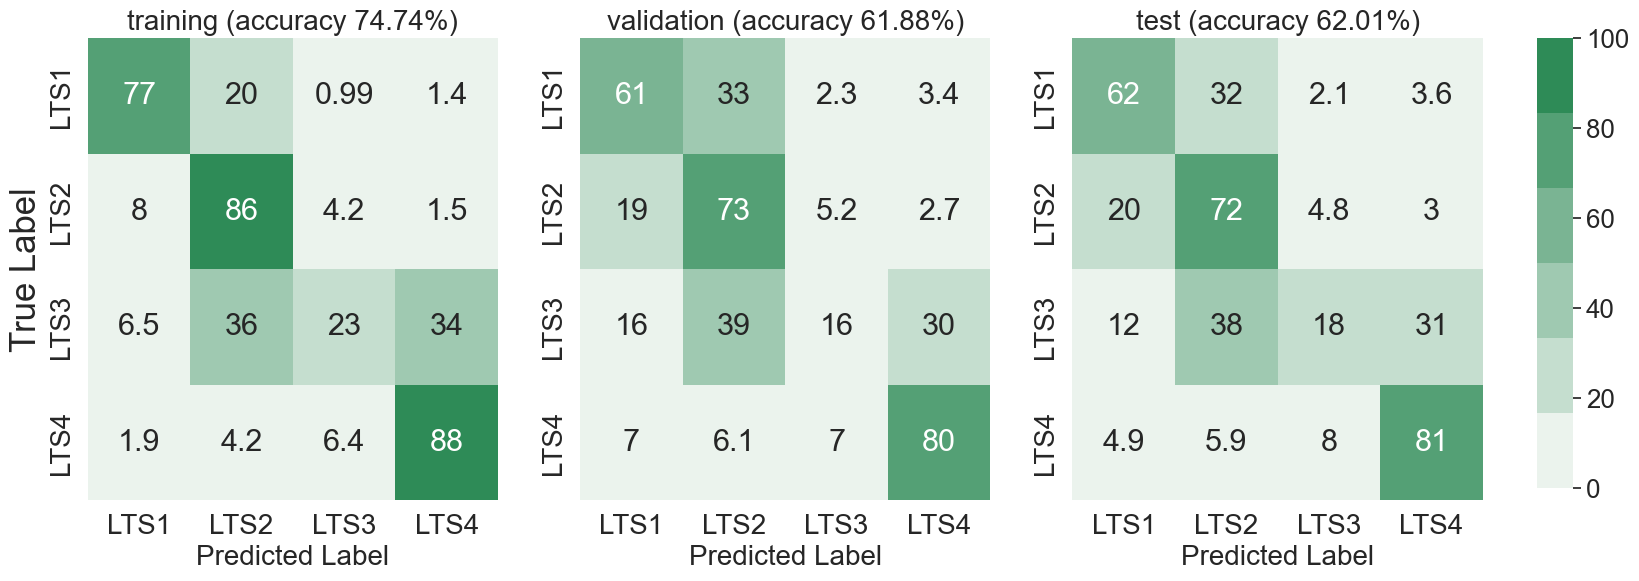

acc  aggacc     ob   mae   mse    flr   fhr   kt
training    74.74   90.95  97.00  0.29  0.38  25.77  3.90  0.0
validation  61.88   86.96  93.43  0.47  0.69  35.12  6.72  0.3
test        62.01   87.03  93.82  0.46  0.67  32.61  6.71  0.3

In [33]:
# MoCo-O-ratio - 580
check_comp_res('8855877_54')

# MoCo Loss Visualization

In [2]:
def check_MoCo_loss(file_name, start=0):
    # load loss records
    path = root + f'{file_name}_loss.txt'
    loss = np.loadtxt(path, delimiter=',')[start:]
    dim = loss.shape
    train_loss = loss[:, 0]
    vali_loss = loss[:, 1]
    # visualize
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(train_loss, label='Train', color='blue')
    if vali_loss.sum() > 1e3:
        scaler = train_loss.mean() / vali_loss.mean()
        ax.plot(vali_loss * scaler, label='Vali', color='red')
    ax.set_title(f'Experiment ID {file_name}', size=15)
    ax.set_xlabel('Epoch', size=20)
    ax.set_ylabel('Mean Cross Entropy Loss', size=20)
    plt.legend(fontsize=18)    
    plt.show()

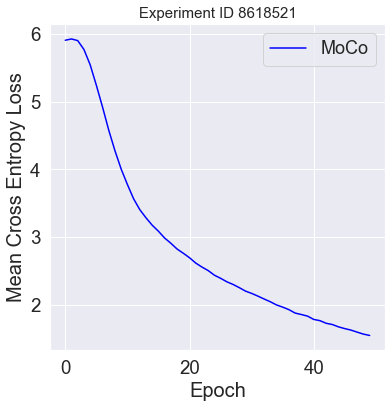

In [7]:
check_MoCo_loss('8618521')

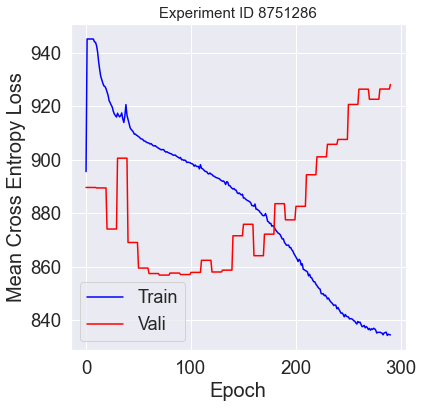

In [8]:
check_MoCo_loss('8751286')

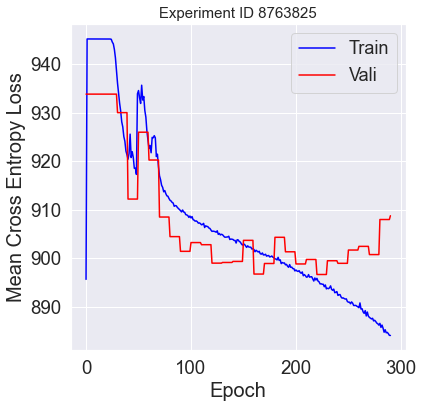

In [4]:
# no gaussian, no jitter
check_MoCo_loss('8763825')

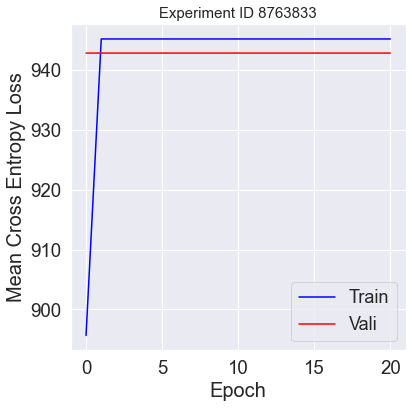

In [6]:
# no gaussian, no greyscale
check_MoCo_loss('8763833')

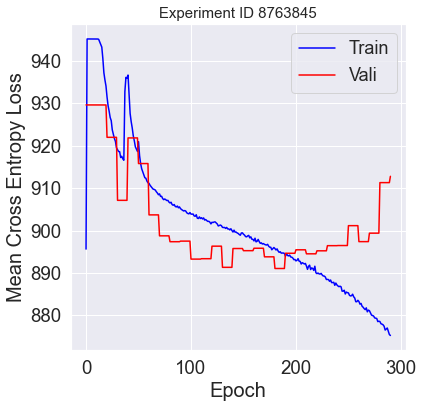

In [8]:
# no greyscale, no jitter
check_MoCo_loss('8763845')

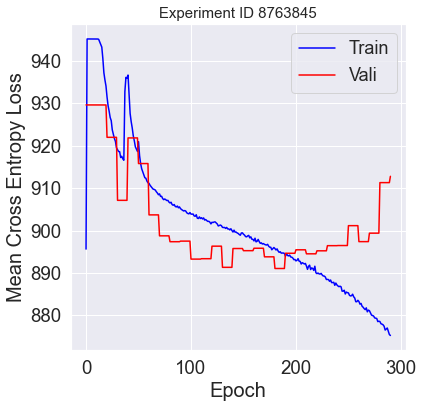

In [7]:
# no gaussian, no greyscale, no jitter
check_MoCo_loss('8763845')

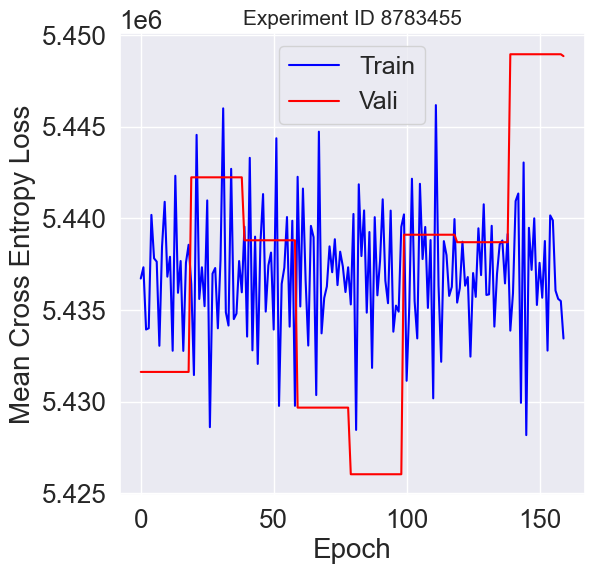

In [6]:
check_MoCo_loss('8783455', start=1)

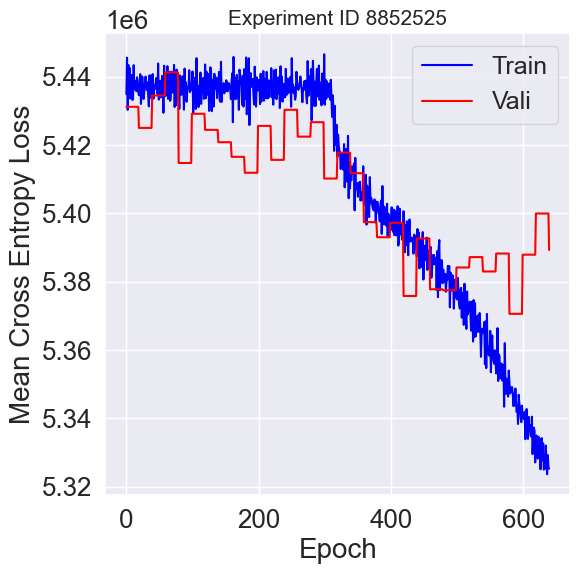

In [24]:
check_MoCo_loss('8852525', start=1)

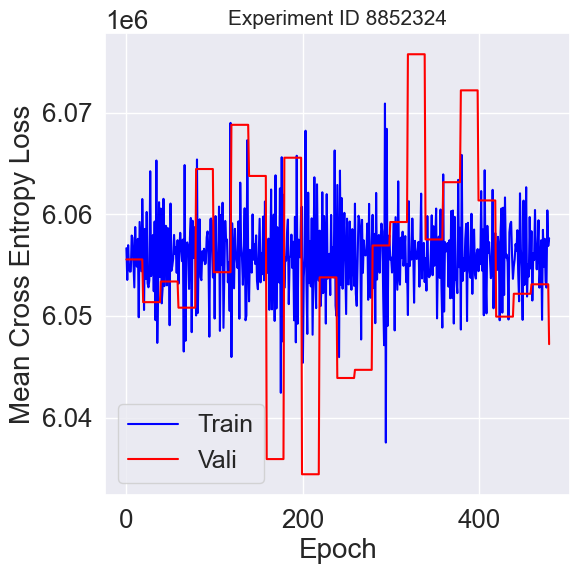

In [45]:
check_MoCo_loss('8852324', start=1)

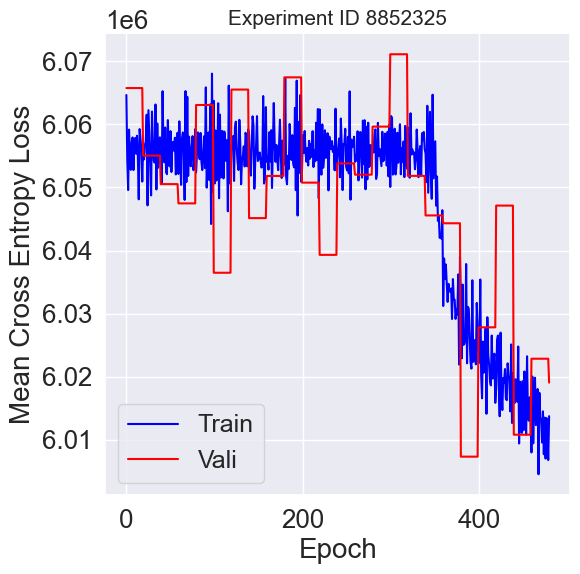

In [48]:
check_MoCo_loss('8852325', start=1)